## Classification of 12 lead ECG to identify Arrhythmias using machine learning and deep learning

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis

### Loading Diagnostics file

In [ ]:
# read the Diagnostics
dataframe = pd.read_excel("/content/gdrive/MyDrive/Diagnostics.xlsx")

In [ ]:
dataframe.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354


In [ ]:
dataframe.shape

(10646, 16)

In [ ]:
# Exploratory Data Analysis
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10646 entries, 0 to 10645
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FileName         10646 non-null  object
 1   Rhythm           10646 non-null  object
 2   Beat             10646 non-null  object
 3   PatientAge       10646 non-null  int64 
 4   Gender           10646 non-null  object
 5   VentricularRate  10646 non-null  int64 
 6   AtrialRate       10646 non-null  int64 
 7   QRSDuration      10646 non-null  int64 
 8   QTInterval       10646 non-null  int64 
 9   QTCorrected      10646 non-null  int64 
 10  RAxis            10646 non-null  int64 
 11  TAxis            10646 non-null  int64 
 12  QRSCount         10646 non-null  int64 
 13  QOnset           10646 non-null  int64 
 14  QOffset          10646 non-null  int64 
 15  TOffset          10646 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 1.3+ MB


### Loading RhythmNames file

In [ ]:
# read full name of rythm
dataframe_rythm = pd.read_excel("/content/gdrive/MyDrive/RhythmNames (1).xlsx")


In [ ]:
dataframe_rythm

,Acronym Name,Full Name
0,SB,Sinus Bradycardia
1,SR,Sinus Rhythm
2,AFIB,Atrial Fibrillation
3,ST,Sinus Tachycardia
4,AF,Atrial Flutter
5,SI,Sinus Irregularity
6,SVT,Supraventricular Tachycardia
7,AT,Atrial Tachycardia
8,AVNRT,Atrioventricular Node Reentrant Tachycardia
9,AVRT,Atrioventricular Reentrant Tachycardia


In [ ]:
dataframe['Rhythm'].value_counts()


SB       3889
SR       1826
AFIB     1780
ST       1568
SVT       587
AF        445
SA        399
AT        121
AVNRT      16
AVRT        8
SAAWR       7
Name: Rhythm, dtype: int64

Text(0.5, 1.0, 'Classes count ')

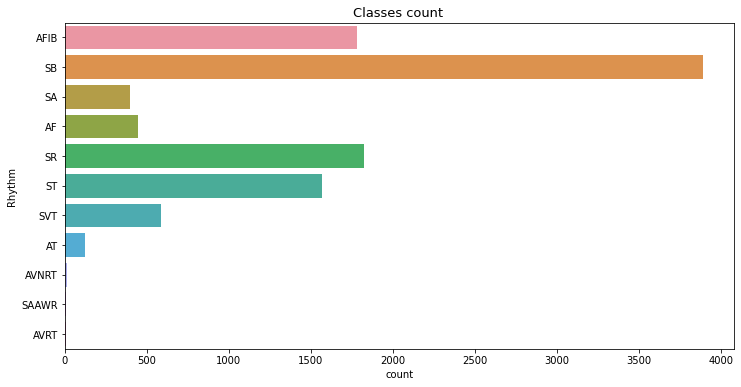

In [ ]:
# Distribution of Rhythm/Labels
plt.figure(figsize=(12, 6))
sns.countplot(y=dataframe['Rhythm'])
plt.title("Classes count ", fontsize=13)


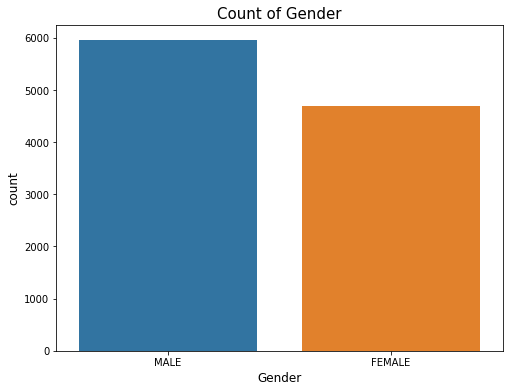

In [ ]:
import seaborn as sns

# bp graph
plt.figure(figsize=(8, 6))
sns.countplot(x=dataframe["Gender"])
plt.title("Count of Gender", fontsize=15)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.show()

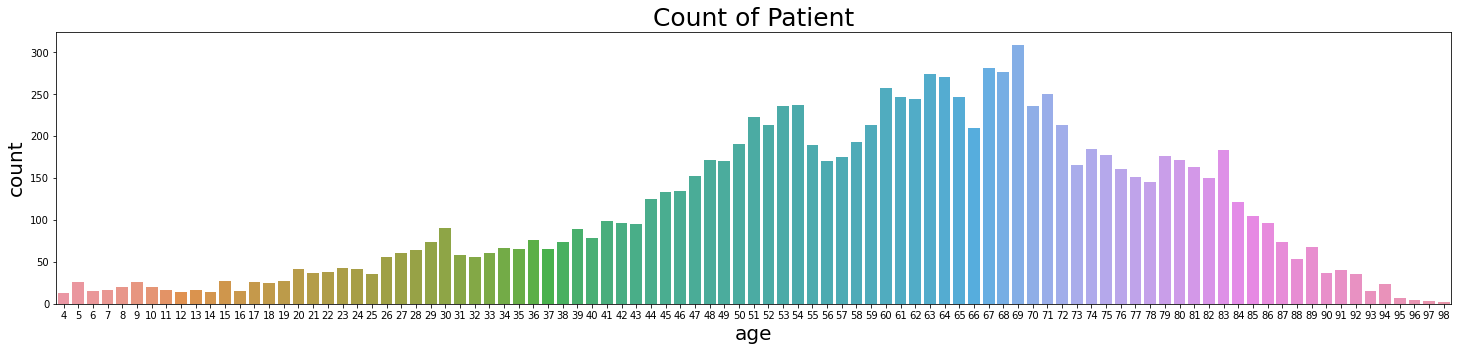

In [ ]:
import seaborn as sns
# bp graph
plt.figure(figsize=(25,5))
sns.countplot(x=dataframe["PatientAge"])
plt.title("Count of Patient",fontsize=25)
plt.xlabel("age",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

# Balancing dataset - Performing undersampling

In [ ]:
# Balancing dataset - Performing undersampling
#
# considering the top 4 labels with most counts
AFIB = dataframe[dataframe['Rhythm'] == 'AFIB']
SB = dataframe[dataframe['Rhythm'] == 'SB']
SR = dataframe[dataframe['Rhythm'] == 'SR']
ST = dataframe[dataframe['Rhythm'] == 'ST']

In [ ]:
# The lowest number of rows in the top 4 labels is ST which has around 1568 rows.
ST.shape

(1568, 16)

In [ ]:
# As the ST label has only 1568 rows, consider 1568 rows for all the other major classes

# concating the dataframe
dataframe = pd.concat([AFIB, SB, SR, ST], ignore_index=True)
y = dataframe['Rhythm']


In [ ]:
# Random Under sampling using imblearn

from imblearn.under_sampling import RandomUnderSampler

# Random undersampling
rus = RandomUnderSampler(random_state=42)
df_resampled, y_resampled = rus.fit_resample(dataframe, y)

In [ ]:
# Balanced classes
df_resampled['Rhythm'].value_counts()

AFIB    1568
SB      1568
SR      1568
ST      1568
Name: Rhythm, dtype: int64

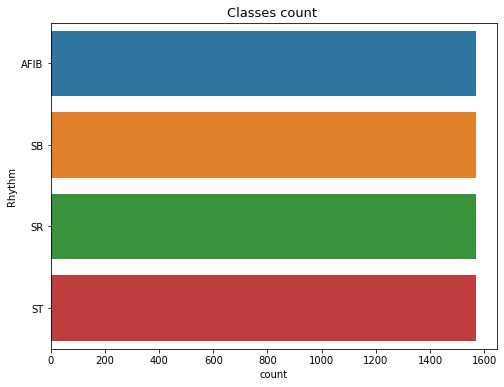

In [ ]:
# Distribution of Rhythm/Labels
plt.figure(figsize=(8, 6))
sns.countplot(y=df_resampled['Rhythm'])
plt.title("Classes count ", fontsize=13)
import seaborn as sns


# Loading the ECG data of the patients

In [ ]:
# loading the ecg data from the csv file
ecg_data = []
count = 0
for i in df_resampled['FileName']:
  count = count + 1
  ecg1 =  pd.read_csv("/content/gdrive/MyDrive/ECGDataDenoised/" + i + ".csv")
  ecg_data.append(ecg1.to_numpy())
  if(count%500 == 0):
    print("Number of records loaded : ", count)

Number of records loaded :  500
Number of records loaded :  1000
Number of records loaded :  1500
Number of records loaded :  2000
Number of records loaded :  2500
Number of records loaded :  3000
Number of records loaded :  3500
Number of records loaded :  4000
Number of records loaded :  4500
Number of records loaded :  5000
Number of records loaded :  5500
Number of records loaded :  6000


In [ ]:
# read csv file of denoised ECG
dataframe_csv = pd.read_csv("/content/gdrive/MyDrive/ECGDataDenoised/MUSE_20180111_155115_19000.csv")


In [ ]:
# read csv file of denoised ECG
# create the column header
header_names= ['I',  'II', 'III', 'aVF', 'aVR', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
dataframe_csv = pd.read_csv("/content/gdrive/MyDrive/ECGDataDenoised/MUSE_20180111_155115_19000.csv", names=header_names)

In [ ]:
dataframe_csv

,I,II,III,aVF,aVR,aVL,V1,V2,V3,V4,V5,V6
0,-165.33,-358.970,-121.710,270.250,-28.869,-231.16,448.39,636.52,618.45,-7.8987,-315.160,-570.84
1,-150.75,-336.810,-114.980,251.410,-23.883,-217.52,441.74,646.47,642.56,35.3890,-269.510,-532.21
2,-136.69,-315.560,-108.630,233.450,-19.126,-204.36,436.06,656.31,665.95,76.5720,-225.830,-495.39
3,-123.74,-296.230,-103.090,217.230,-14.815,-192.29,432.27,666.14,688.05,113.5100,-186.000,-461.84
4,-112.57,-279.750,-98.611,203.530,-11.213,-181.87,431.08,676.31,708.47,144.3000,-151.680,-432.56
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-190.32,52.396,170.760,74.543,-170.890,107.63,310.73,398.59,538.11,230.9700,87.684,-249.88
4996,-178.98,65.438,171.870,62.325,-165.650,114.41,302.32,398.80,541.18,245.2700,110.940,-226.42
4997,-171.04,74.181,172.080,53.876,-161.490,118.93,297.25,401.02,544.16,254.4800,129.340,-207.20
4998,-165.46,79.570,171.300,48.203,-157.840,121.64,293.97,403.86,546.18,259.5100,144.140,-190.64


# Plotting the ecg on graph

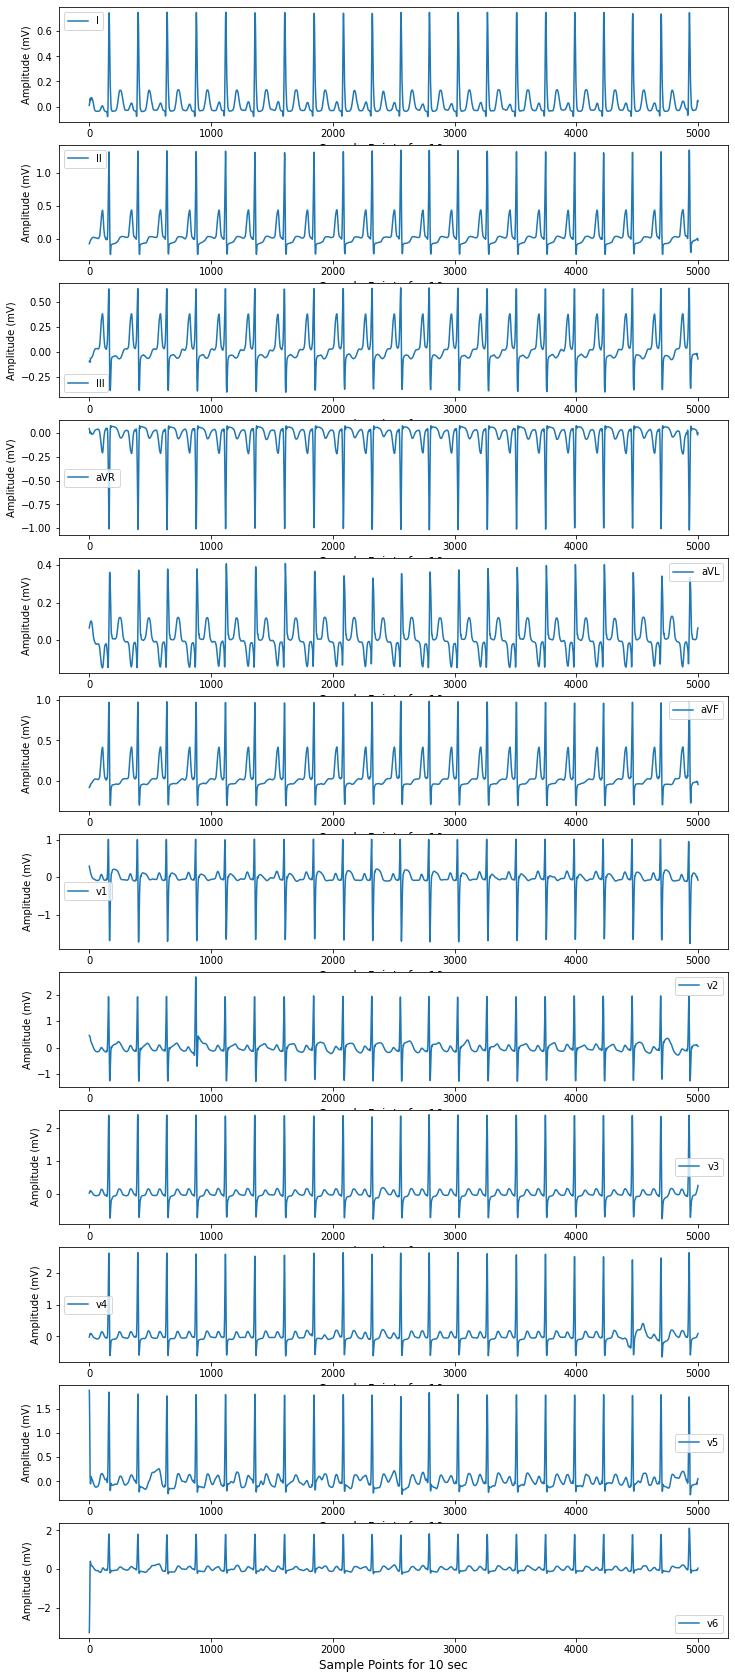

In [ ]:
# plotting first ecg data 

fig, axes = plt.subplots(12, 1, figsize=(12, 30))
leads = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6']
for i, ax in enumerate(axes.flatten()):
    y = ecg1.iloc[0:5000, i].values
    y = y / 500
    # ax.plot(y, color=plt.cm.Paired(i / 10.),label=leads[i])
    ax.plot(y,label=leads[i])
    axes[i].set_ylabel('Amplitude (mV)')
    # axes[i].set_label(leads[i])
    axes[i].set_xlabel('Sample Points for 10 sec',fontsize=12)
    # plt.xlabel('Sample Point')
    axes[i].legend()
plt.show()

## Feature Extraction

In [ ]:
# Feature Extraction to find Heart rate variablity and RR interval along with statistical values
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# signal processing
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore

In [ ]:
column_names = []
def group_peaks(p, threshold=5):
    '''
    To group the peaks of the ECG signal
    '''
    output = np.empty(0)

    peakgrp, num_groups = label(np.diff(p) < threshold)

    for i in np.unique(peakgrp)[1:]:
        peak_group = p[np.where(peakgrp == i)]
        output = np.append(output, np.median(peak_group))
    return output


def time_feature_domain(rr):
    results = {}

    results_vector = []
    hr = 60000/rr

    # calculating the statistical values of RR and Heart rate variablity
    results['mean RR ms'] = np.mean(rr)
    results['STD RR/SDNN ms'] = np.std(rr)
    results['mean HR beats/min'] = np.mean(hr)
    results['std HR beats/min'] = np.std(hr)
    results['min HR beats/min'] = np.min(hr)
    results['max HR beats/min'] = np.max(hr)
    return results

def select_peaks_from_signal(ecgS, threshold=0.3, filterqrs=None):
    '''
    Detect peak using cross correlation threshold
    '''
    if filterqrs is None:
        t = np.linspace(1.5 * np.pi, 3.5 * np.pi, 15)
        filterqrs = np.sin(t)

    # normalize data
    ecgS = (ecgS - ecgS.mean()) / ecgS.std()

    # calculate cross correlation
    similarity = np.correlate(ecgS, filterqrs, mode="same")
    similarity = similarity / np.max(similarity)

    # return peaks
    return ecgS[similarity > threshold].index, similarity

def plot_range(startpoint=10, endpoint=20, n=5):
    distance = endpoint - startpoint
    for i in np.arange(startpoint, endpoint, np.floor(distance/n)):
        yield (int(i), int(np.minimum(endpoint, np.floor(distance/n) + i)))

def process_stats_in_ecg(signal):
  signal_processed_stats = []
  leadsInformation = ['I', 'II', 'III', 'aVF', 'aVR', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
  for i in range(0,12):

    # find peaks
    peaks, similarity = select_peaks_from_signal(signal[i], threshold=0.3)

    # grouping peaks
    grouped_peaks = group_peaks(peaks)

    # RR-intervals are the difference between the peaks
    rr = np.diff(grouped_peaks)
    rr_corrected = rr.copy()
    rr_corrected[np.abs(zscore(rr)) > 2] = np.median(rr)
    rest = time_feature_domain(rr)
    lead1_stats = list(rest.values()) #['mean RR ms', 'STD RR/SDNN ms', 'mean HR beats/min', 'std HR beats/min', 'min HR beats/min', 'max HR beats/min']
    for val in lead1_stats:
      signal_processed_stats.append(val)
    arrData = ['mean RR ms -'+leadsInformation[i] , 'STD RR/SDNN ms -'+leadsInformation[i], 'mean HR beats/min -'+leadsInformation[i], 'std HR beats/min -'+leadsInformation[i], 'min HR beats/min -'+leadsInformation[i], 'max HR beats/min -'+leadsInformation[i]]
    if(len(column_names) <=72):
      for i in arrData:
        column_names.append(i)
    signal_processed_stats_flatten = np.array(signal_processed_stats)
    # print(signal_processed_stats_flatten)

  return signal_processed_stats_flatten

In [ ]:
# existing features name
cols = ['VentricularRate','AtrialRate','QRSDuration','QTInterval' 	,'QTCorrected' 	,'RAxis' 	,'TAxis' 	,'QRSCount' 	,'QOnset' 	,'QOffset' 	,'TOffset']

df_existing_features = []
df_existing_features.append(dataframe.iloc[0][cols].tolist())

In [ ]:
processed_signals = []
index_to_skip = []

df_existing_features = []
temp = 0
temp_features = []
# calculating features and reading existing features for the index
for i in ecg_data:
  try:
    ecg_processed = process_stats_in_ecg(pd.DataFrame(i))
    processed_signals.append(ecg_processed)
    df_existing_features.append(dataframe.iloc[temp][cols].tolist())
  except:
    print(temp)
    index_to_skip.append(temp)
  temp = temp + 1

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


8
28
100
157
179
299
364
377
388
397
408
409
450
605
649
650
681
710
728
766
786
886
960
1067
1095
1111
1121
1146
1248
1529
1550
1950
1986
2061
2440
2600
2673
2761
3231
3299
3506
3517
3710
4015
4303
4319
4585
4654
4798
4813
5003
5084
5088
5133
5237
5330
5336
5394
5465
5509
5546
5559
5682
5700
5999
6001
6040
6113
6172
6201


In [ ]:
processed_signals[0].shape


(72,)

In [ ]:
df_features = pd.DataFrame(processed_signals)
df_existing_features = pd.DataFrame(df_existing_features)


In [ ]:
df_features.shape

(6202, 72)

In [ ]:
df_feat = pd.concat([df_features, df_existing_features], axis=1)

In [ ]:
df_feat.shape  # 72 calculated features + 11 existing features

(6202, 83)

In [ ]:
# removing few dataframe values
dataframe = df_resampled.drop(index_to_skip)


In [ ]:
dataframe.head()


,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180114_135033_25000,AFIB,STDD STTC TWC,78,FEMALE,69,51,86,512,548,-19,269,12,221,264,477
1,MUSE_20180113_124113_39000,AFIB,AQW,64,MALE,67,394,94,440,464,16,16,11,213,260,433
2,MUSE_20180115_120445_33000,AFIB,ARS LBBB LVQRSCL STDD STTC TWO,47,FEMALE,130,122,164,312,459,118,-86,21,200,282,356
3,MUSE_20180118_123009_54000,AFIB,NONE,75,FEMALE,150,150,94,336,530,43,32,25,218,265,386
4,MUSE_20180712_160452_75000,AFIB,LVH,74,MALE,49,57,92,488,440,64,70,7,221,267,465


In [ ]:
cols = ['VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis', 'QRSCount',
        'QOnset', 'QOffset', 'TOffset']


In [ ]:

leadsInformation = ['I', 'II', 'III', 'aVF', 'aVR', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

cols = []
for i in range(0, 12):
    arrData = ['mean RR ms -' + leadsInformation[i], 'STD RR/SDNN ms -' + leadsInformation[i],
               'mean HR beats/min -' + leadsInformation[i], 'std HR beats/min -' + leadsInformation[i],
               'min HR beats/min -' + leadsInformation[i], 'max HR beats/min -' + leadsInformation[i]]
    for j in arrData:
        cols.append(j)
additional_cols = ['VentricularRate', 'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis', 'TAxis',
                   'QRSCount', 'QOnset', 'QOffset', 'TOffset']

# Adding the existing columns
for i in additional_cols:
    cols.append(i)

In [ ]:
len(cols)


83

In [ ]:
df_feat.columns = cols

In [ ]:
# Seperating train and test data
df_feat['y'] = dataframe['Rhythm']


In [ ]:
df_feat = df_feat.dropna()

In [ ]:
# Ecg statistical calculations dataframe obtained from denoised ecg values
X = np.array(df_feat.drop('y', axis=1))
X = df_feat.drop(['y'], axis=1)
y = df_feat['y']

In [ ]:
# Encoding label
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y = le.fit_transform(y)
print("Encoded labels are ", y)
print("Original form is ", le.classes_)

Encoded labels are  [0 0 0 ... 3 3 3]
Original form is  ['AFIB' 'SB' 'SR' 'ST']


## Univariate analysis

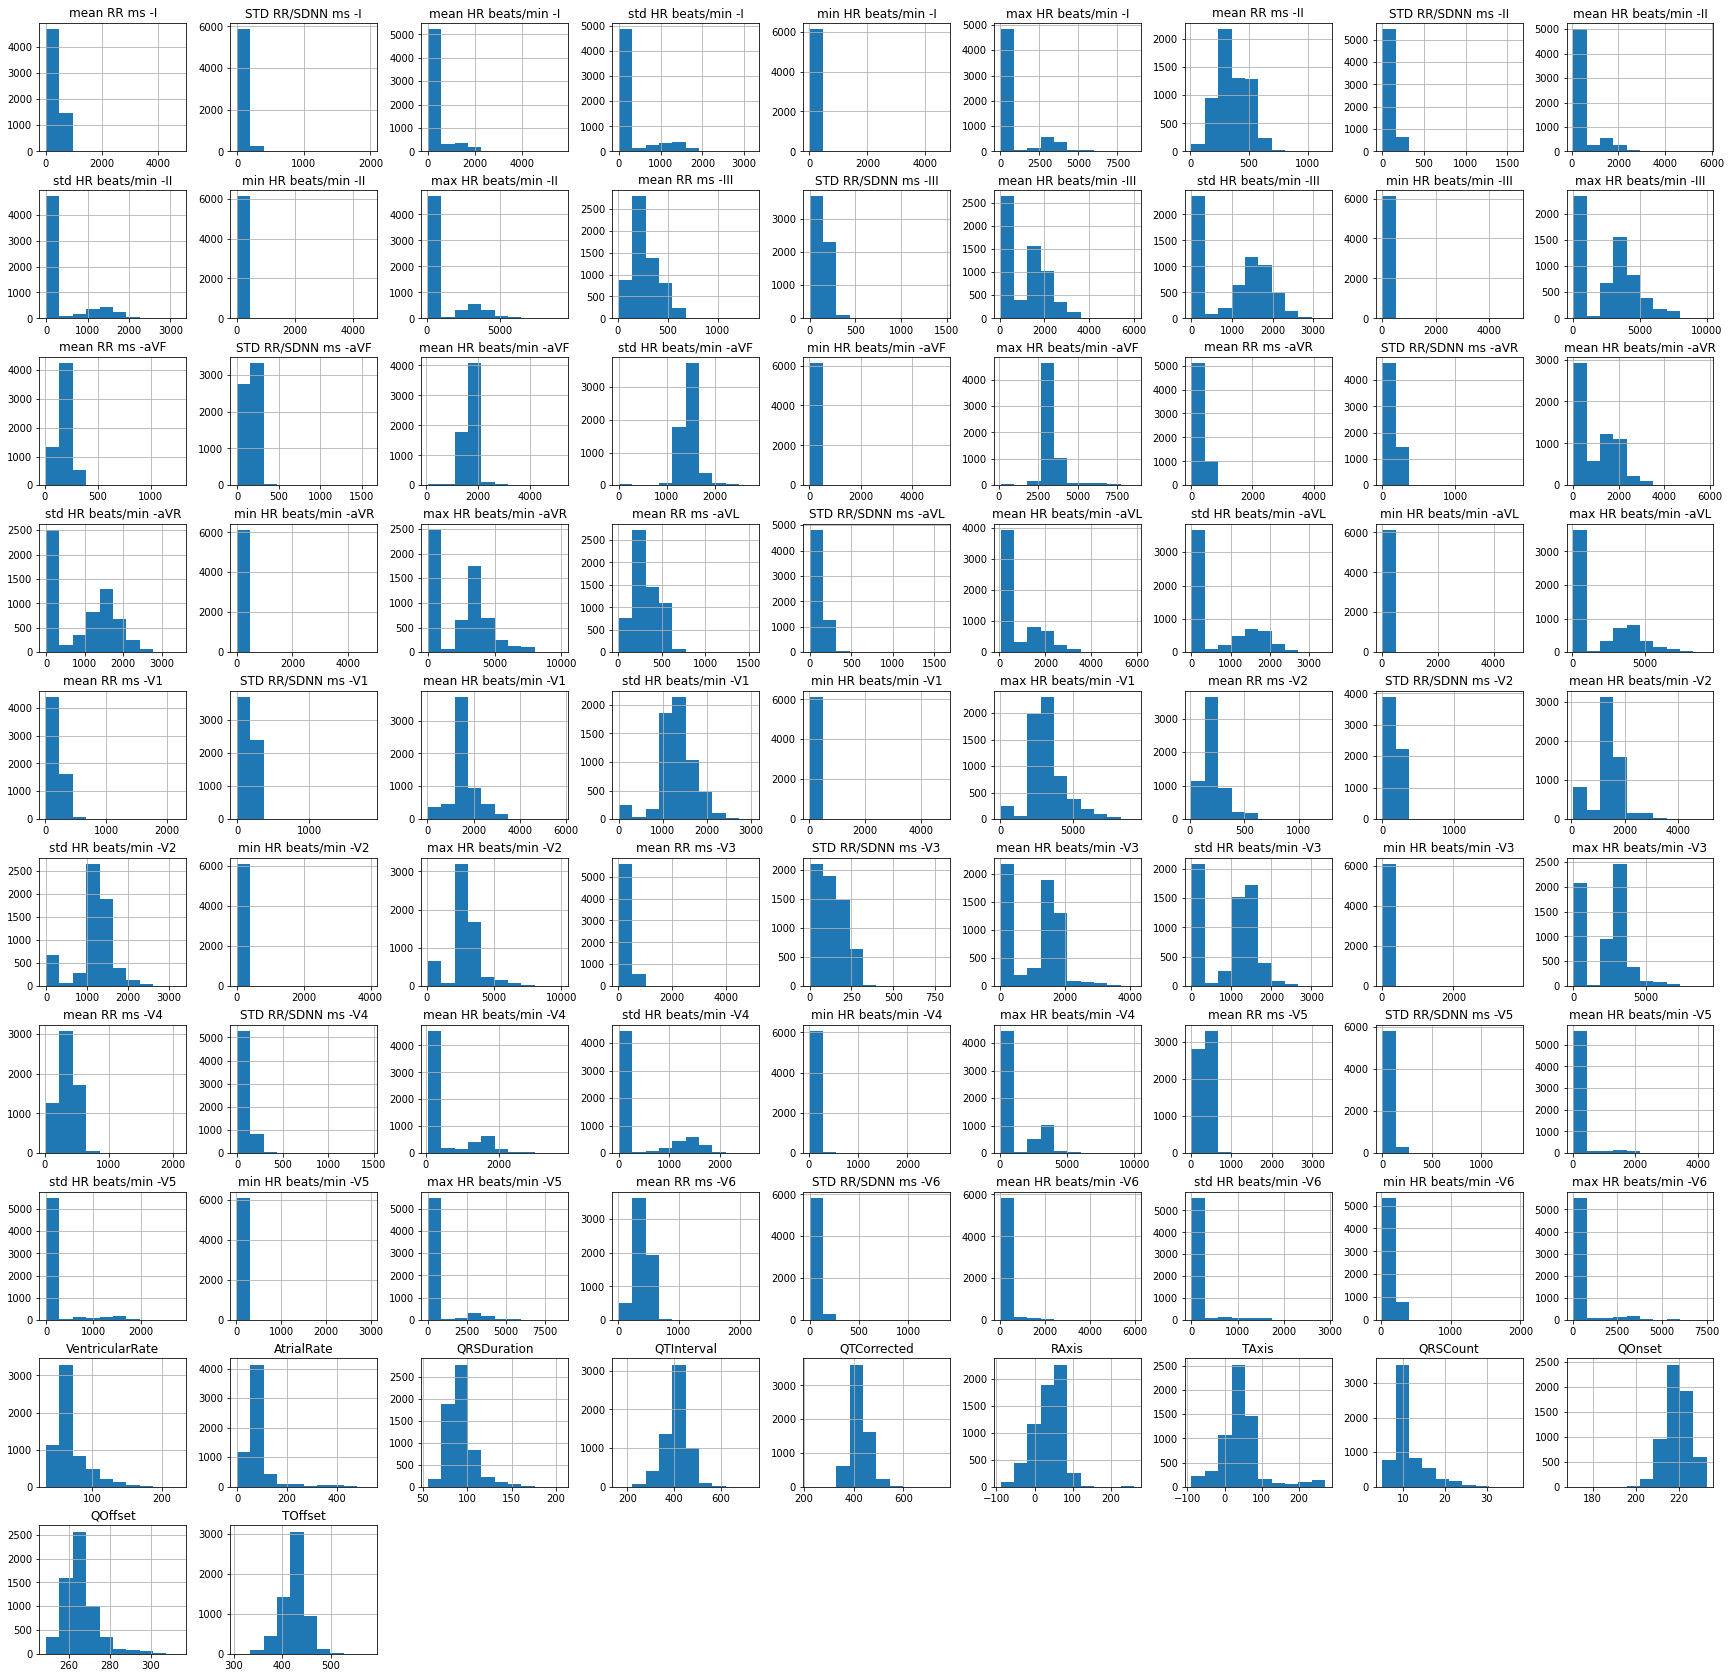

In [ ]:
# Univariate analysis
# Checking the distribution of features(Histogram)

import matplotlib.pyplot as plt

df_feat.hist(df_feat.columns[:],figsize = (30,30));

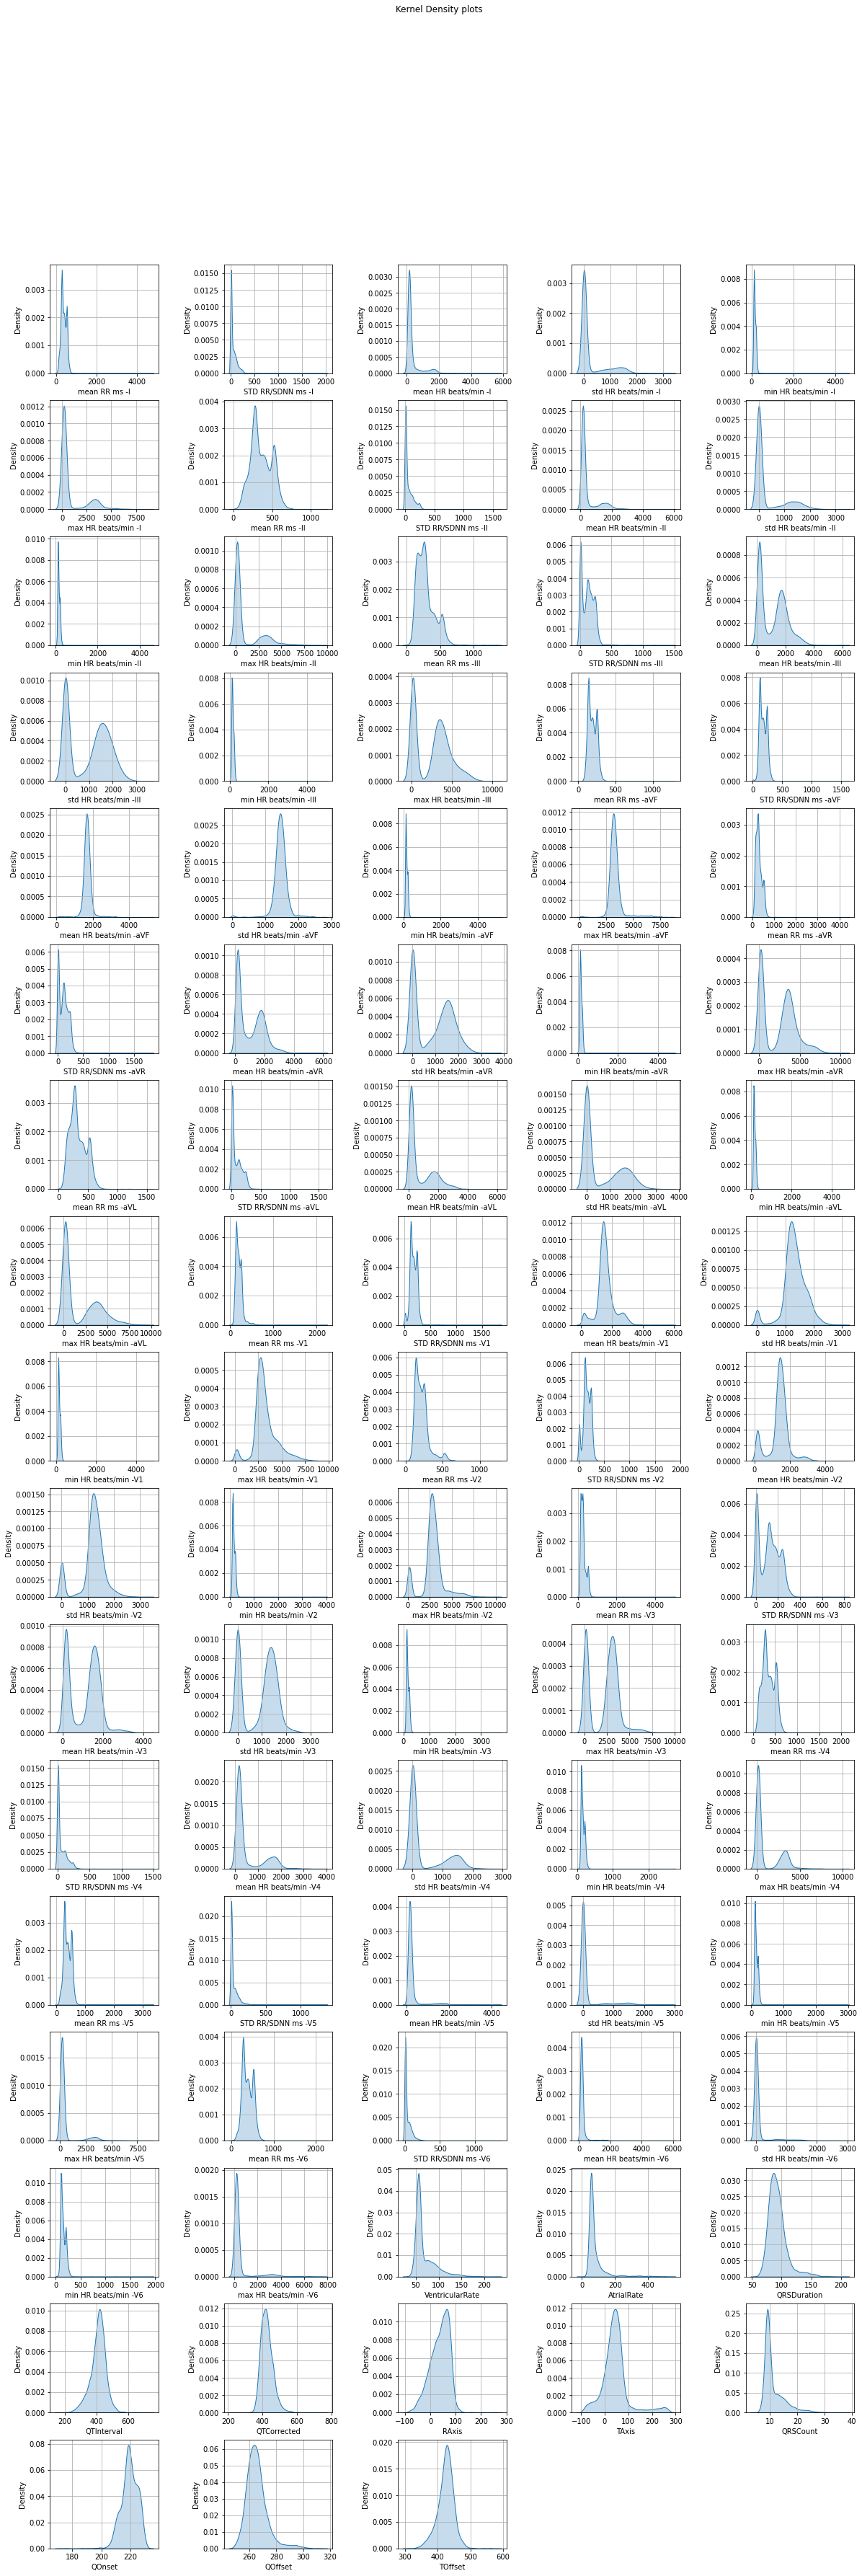

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,50))
features = ['mean RR ms -I','STD RR/SDNN ms -I','mean HR beats/min -I','std HR beats/min -I','min HR beats/min -I','max HR beats/min -I','mean RR ms -II','STD RR/SDNN ms -II',
            'mean HR beats/min -II','std HR beats/min -II','min HR beats/min -II','max HR beats/min -II','mean RR ms -III','STD RR/SDNN ms -III','mean HR beats/min -III',
            'std HR beats/min -III','min HR beats/min -III','max HR beats/min -III','mean RR ms -aVF','STD RR/SDNN ms -aVF','mean HR beats/min -aVF','std HR beats/min -aVF',
            'min HR beats/min -aVF','max HR beats/min -aVF','mean RR ms -aVR','STD RR/SDNN ms -aVR','mean HR beats/min -aVR','std HR beats/min -aVR','min HR beats/min -aVR',
            'max HR beats/min -aVR','mean RR ms -aVL','STD RR/SDNN ms -aVL','mean HR beats/min -aVL','std HR beats/min -aVL','min HR beats/min -aVL','max HR beats/min -aVL',
            'mean RR ms -V1','STD RR/SDNN ms -V1','mean HR beats/min -V1','std HR beats/min -V1','min HR beats/min -V1','max HR beats/min -V1','mean RR ms -V2','STD RR/SDNN ms -V2',
            'mean HR beats/min -V2','std HR beats/min -V2','min HR beats/min -V2','max HR beats/min -V2','mean RR ms -V3','STD RR/SDNN ms -V3','mean HR beats/min -V3',
            'std HR beats/min -V3','min HR beats/min -V3','max HR beats/min -V3','mean RR ms -V4','STD RR/SDNN ms -V4','mean HR beats/min -V4','std HR beats/min -V4',
            'min HR beats/min -V4','max HR beats/min -V4','mean RR ms -V5','STD RR/SDNN ms -V5','mean HR beats/min -V5','std HR beats/min -V5','min HR beats/min -V5',
            'max HR beats/min -V5','mean RR ms -V6','STD RR/SDNN ms -V6','mean HR beats/min -V6','std HR beats/min -V6','min HR beats/min -V6','max HR beats/min -V6',
            'VentricularRate','AtrialRate','QRSDuration','QTInterval','QTCorrected','RAxis','TAxis','QRSCount','QOnset','QOffset','TOffset']
for n, data in enumerate(features):
  # ax=plt.subplot(28,3,n+1)
  ax=plt.subplot(17,5,n+1)
  sns.kdeplot(data=df_feat, x=data, shade=True)
  plt.grid('on')  

# plt.subplots_adjust(wspace=0.35, bottom=0.2, hspace=0.4)
plt.subplots_adjust(wspace=0.5, bottom=0, hspace=0.2)
plt.suptitle("Kernel Density plots") 
plt.show()      


Plot for column :  mean RR ms -I


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


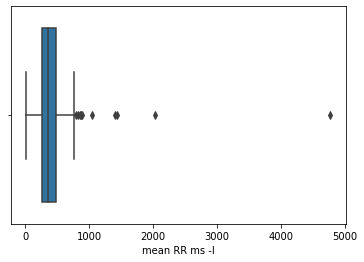

Plot for column :  STD RR/SDNN ms -I


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


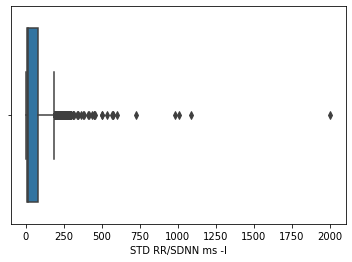

Plot for column :  mean HR beats/min -I


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


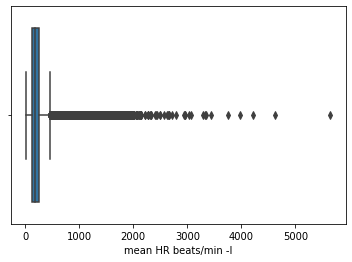

Plot for column :  std HR beats/min -I


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


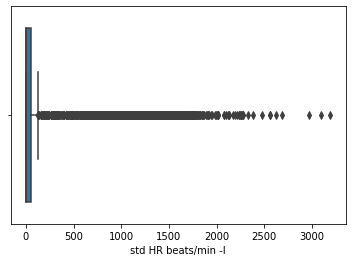

Plot for column :  min HR beats/min -I


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


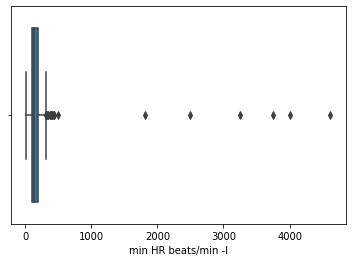

Plot for column :  max HR beats/min -I


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


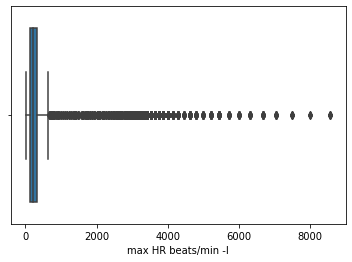

Plot for column :  mean RR ms -II


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


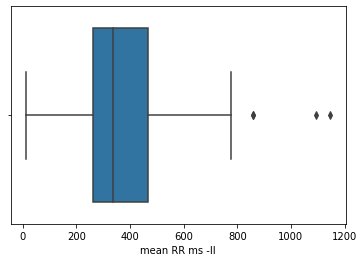

Plot for column :  STD RR/SDNN ms -II


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


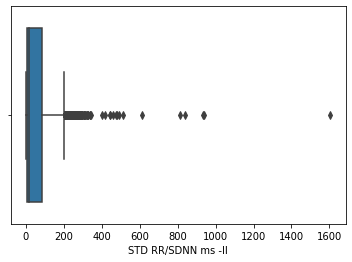

Plot for column :  mean HR beats/min -II


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


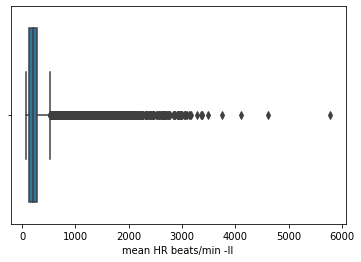

Plot for column :  std HR beats/min -II


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


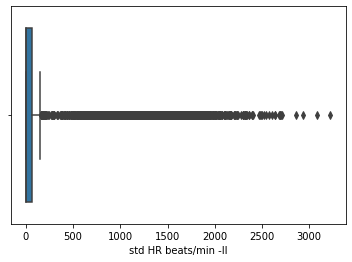

Plot for column :  min HR beats/min -II


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


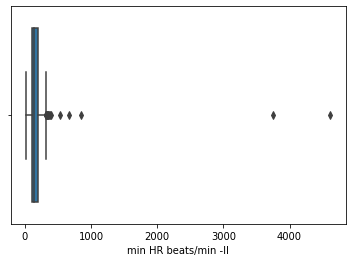

Plot for column :  max HR beats/min -II


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


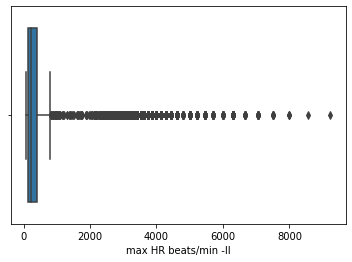

Plot for column :  mean RR ms -III


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


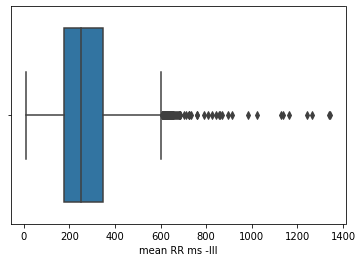

Plot for column :  STD RR/SDNN ms -III


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


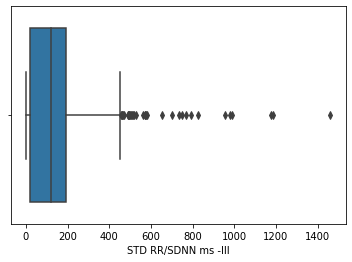

Plot for column :  mean HR beats/min -III


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


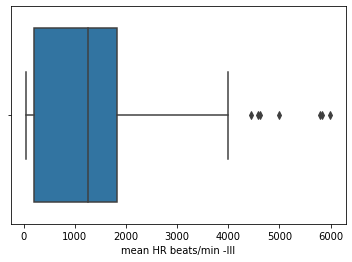

Plot for column :  std HR beats/min -III


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


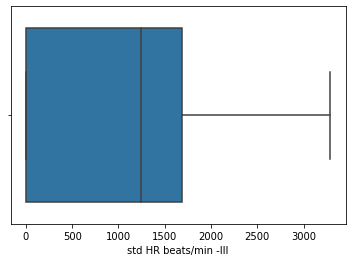

Plot for column :  min HR beats/min -III


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


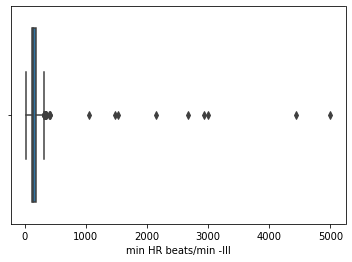

Plot for column :  max HR beats/min -III


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


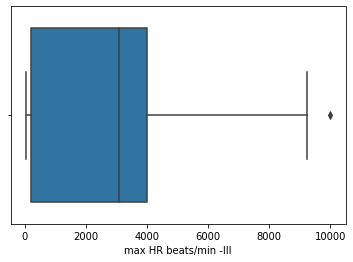

Plot for column :  mean RR ms -aVF


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


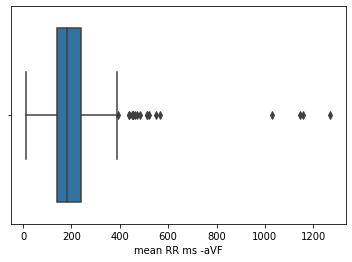

Plot for column :  STD RR/SDNN ms -aVF


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


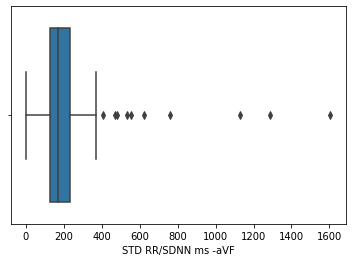

Plot for column :  mean HR beats/min -aVF


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


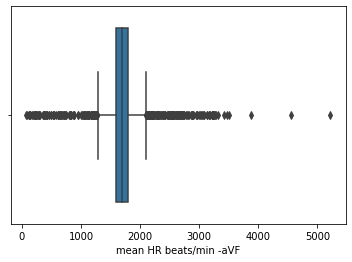

Plot for column :  std HR beats/min -aVF


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


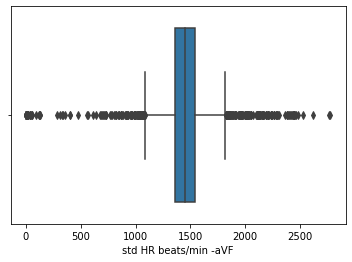

Plot for column :  min HR beats/min -aVF


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


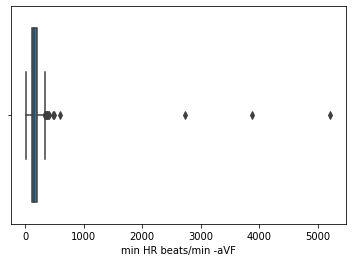

Plot for column :  max HR beats/min -aVF


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


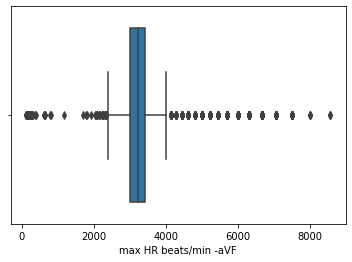

Plot for column :  mean RR ms -aVR


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


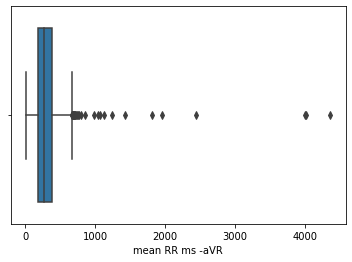

Plot for column :  STD RR/SDNN ms -aVR


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


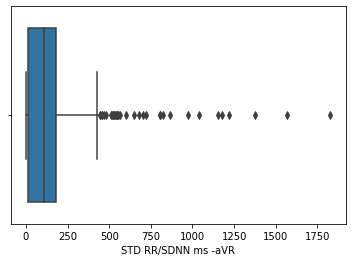

Plot for column :  mean HR beats/min -aVR


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


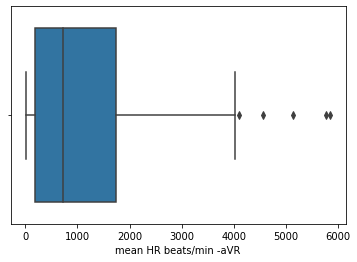

Plot for column :  std HR beats/min -aVR


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


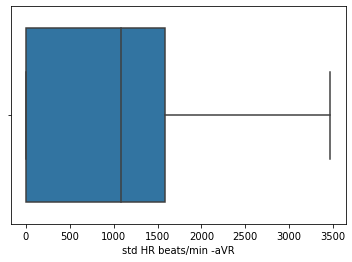

Plot for column :  min HR beats/min -aVR


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


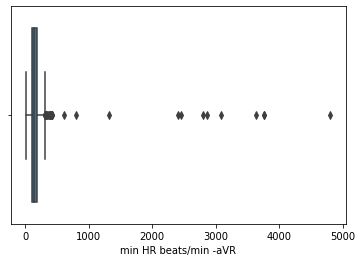

Plot for column :  max HR beats/min -aVR


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


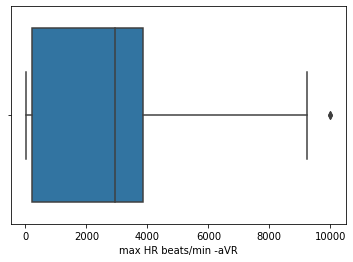

Plot for column :  mean RR ms -aVL


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


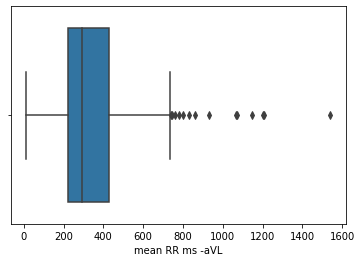

Plot for column :  STD RR/SDNN ms -aVL


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


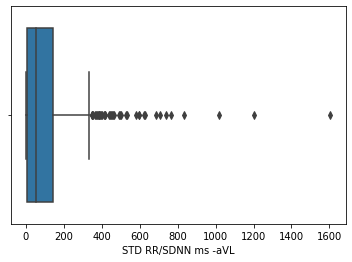

Plot for column :  mean HR beats/min -aVL


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


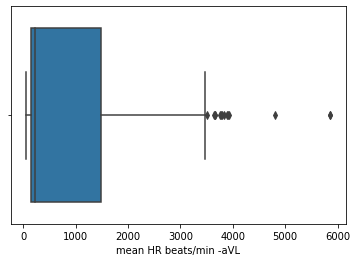

Plot for column :  std HR beats/min -aVL


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


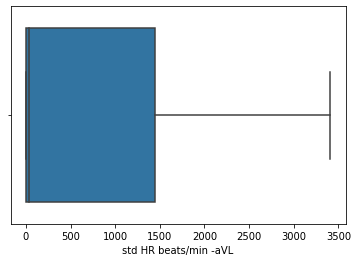

Plot for column :  min HR beats/min -aVL


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


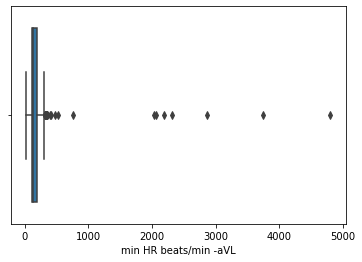

Plot for column :  max HR beats/min -aVL


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


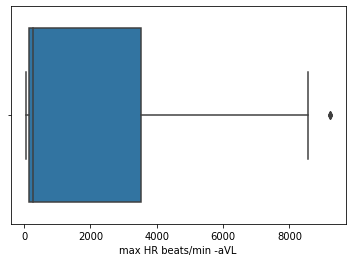

Plot for column :  mean RR ms -V1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


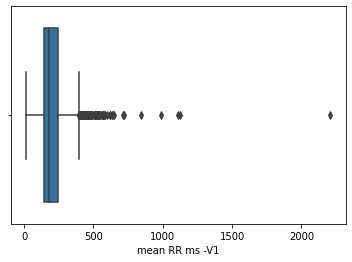

Plot for column :  STD RR/SDNN ms -V1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


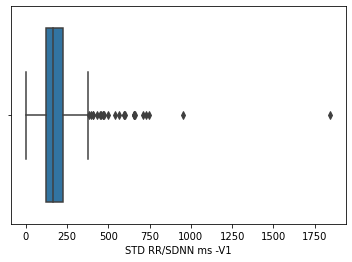

Plot for column :  mean HR beats/min -V1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


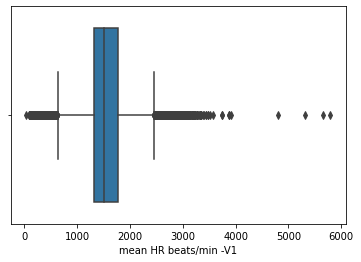

Plot for column :  std HR beats/min -V1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


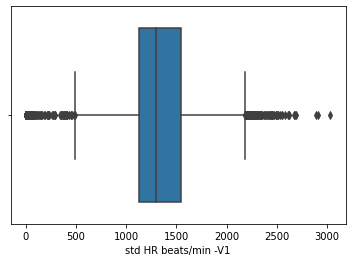

Plot for column :  min HR beats/min -V1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


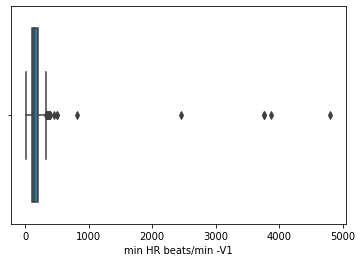

Plot for column :  max HR beats/min -V1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


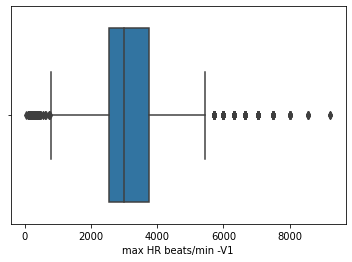

Plot for column :  mean RR ms -V2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


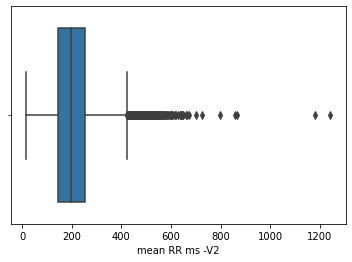

Plot for column :  STD RR/SDNN ms -V2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


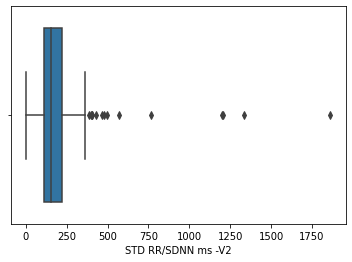

Plot for column :  mean HR beats/min -V2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


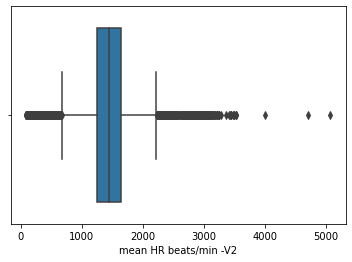

Plot for column :  std HR beats/min -V2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


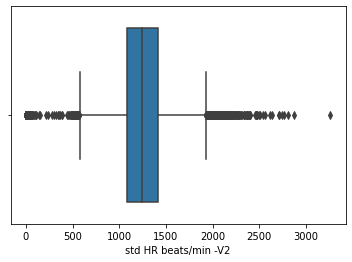

Plot for column :  min HR beats/min -V2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


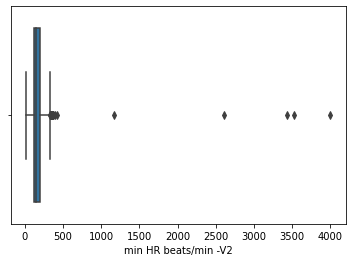

Plot for column :  max HR beats/min -V2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


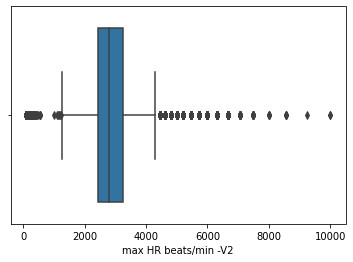

Plot for column :  mean RR ms -V3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


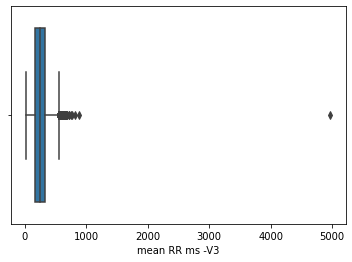

Plot for column :  STD RR/SDNN ms -V3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


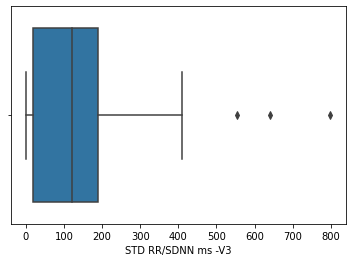

Plot for column :  mean HR beats/min -V3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


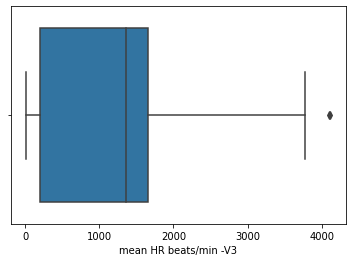

Plot for column :  std HR beats/min -V3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


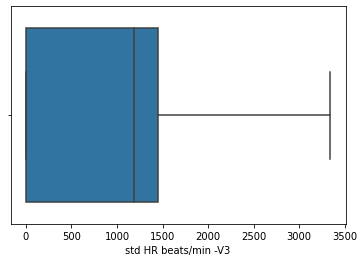

Plot for column :  min HR beats/min -V3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


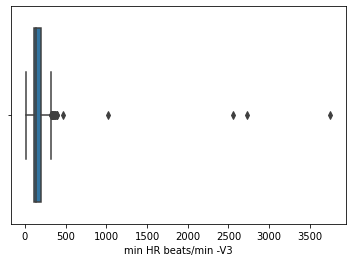

Plot for column :  max HR beats/min -V3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


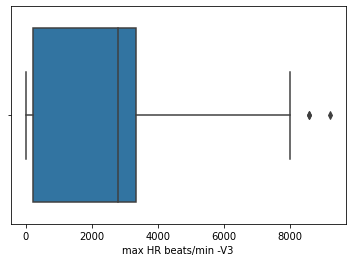

Plot for column :  mean RR ms -V4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


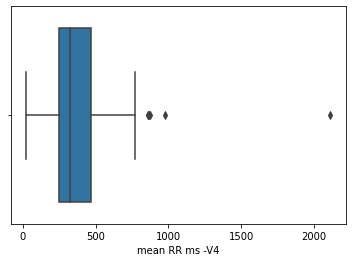

Plot for column :  STD RR/SDNN ms -V4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


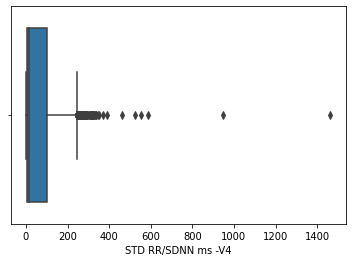

Plot for column :  mean HR beats/min -V4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


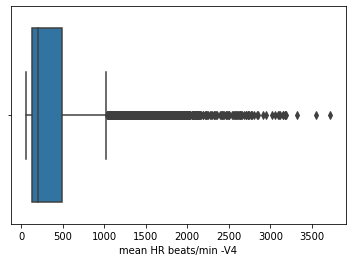

Plot for column :  std HR beats/min -V4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


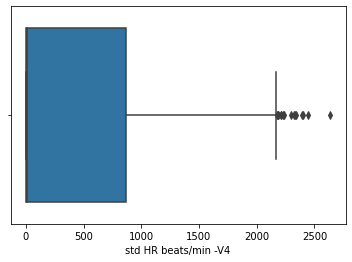

Plot for column :  min HR beats/min -V4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


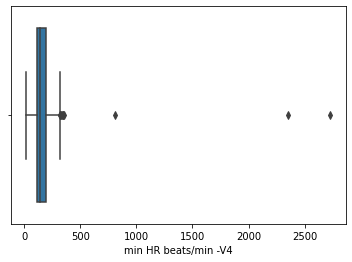

Plot for column :  max HR beats/min -V4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


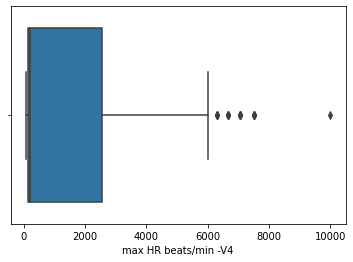

Plot for column :  mean RR ms -V5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


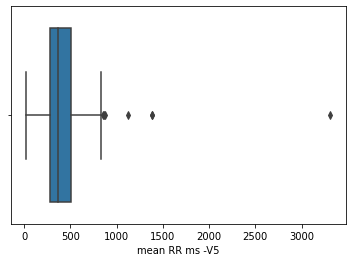

Plot for column :  STD RR/SDNN ms -V5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


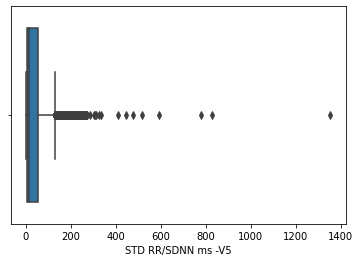

Plot for column :  mean HR beats/min -V5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


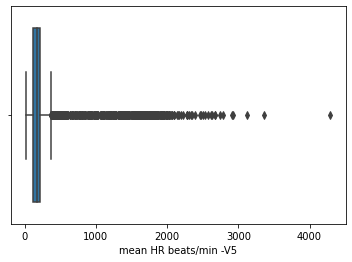

Plot for column :  std HR beats/min -V5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


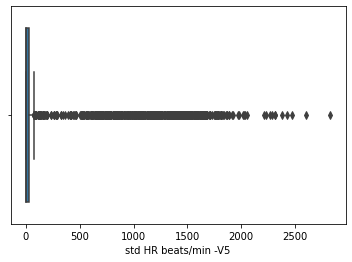

Plot for column :  min HR beats/min -V5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


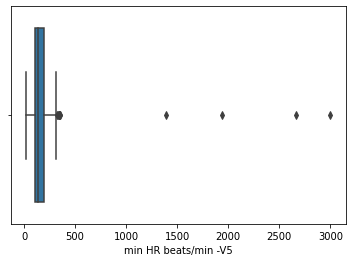

Plot for column :  max HR beats/min -V5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


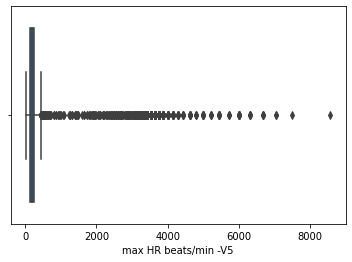

Plot for column :  mean RR ms -V6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


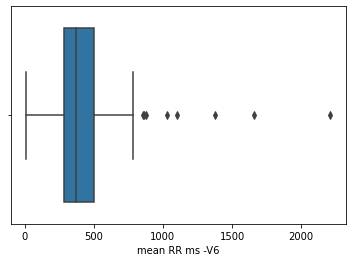

Plot for column :  STD RR/SDNN ms -V6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


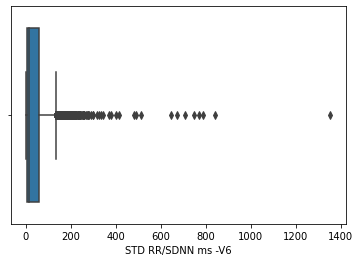

Plot for column :  mean HR beats/min -V6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


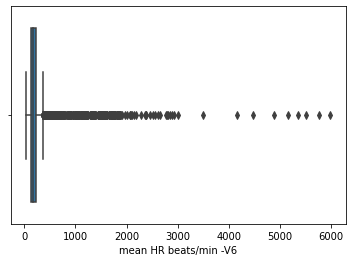

Plot for column :  std HR beats/min -V6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


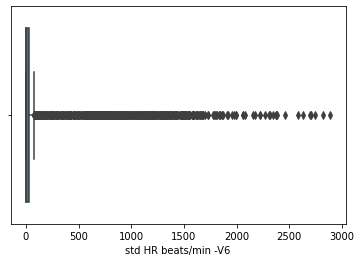

Plot for column :  min HR beats/min -V6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


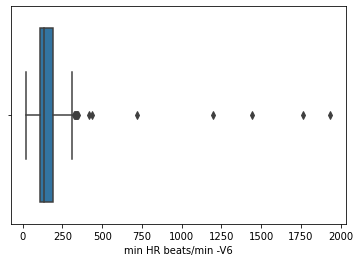

Plot for column :  max HR beats/min -V6


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


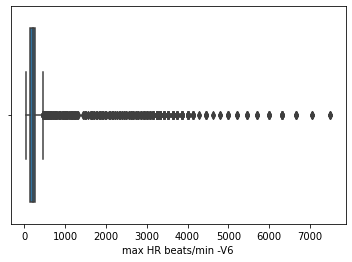

Plot for column :  VentricularRate


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


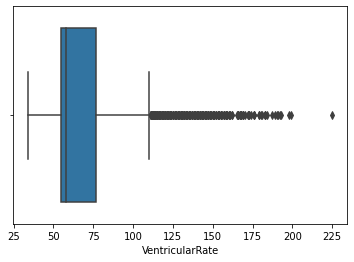

Plot for column :  AtrialRate


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


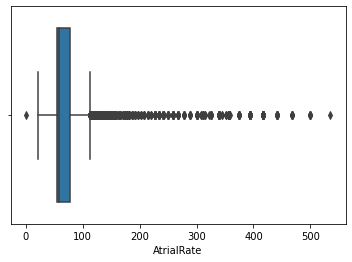

Plot for column :  QRSDuration


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


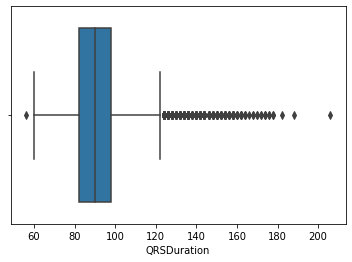

Plot for column :  QTInterval


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


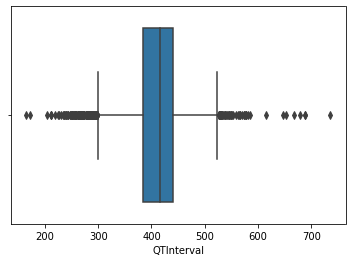

Plot for column :  QTCorrected


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


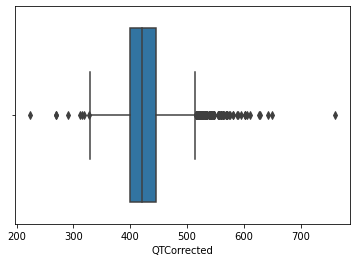

Plot for column :  RAxis


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


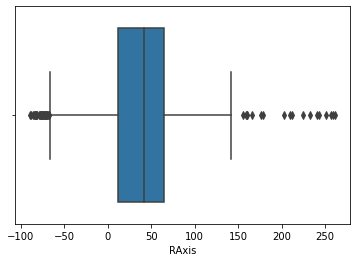

Plot for column :  TAxis


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


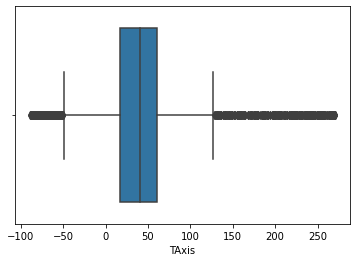

Plot for column :  QRSCount


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


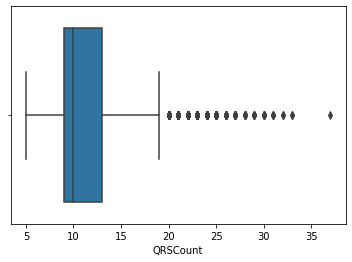

Plot for column :  QOnset


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


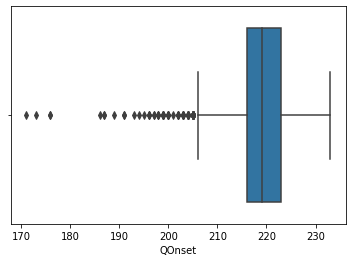

Plot for column :  QOffset


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


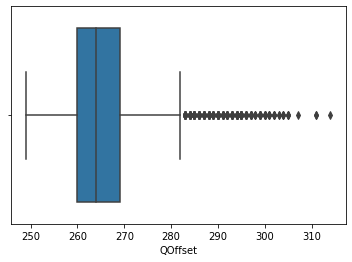

Plot for column :  TOffset


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


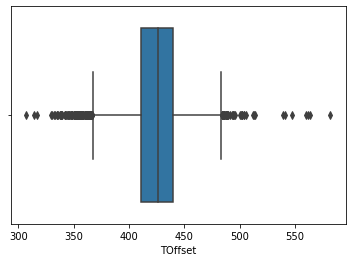

In [ ]:
# Univariate analysis
# Checking the distribution of features(Box plot)
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

df_temp = df_feat.drop('y',axis=1)
for i in df_temp.columns:
  print("Plot for column : ",i)
  sns.boxplot(df_feat[i], orient="h")
  plt.show()

## Multivariate Analysis - Heatmap for correlation coefficient

In [ ]:
# # heatmap for correlation coefficient
plt.figure(figsize = (45,45))
sns.set(font_scale=1.15)
sns.heatmap(df_feat.corr(method = 'pearson'),
           annot = True,
           cmap = "RdBu_r",
           linewidths = 5,
           linecolor = "white")
plt.title("Correlation matrix of ECG Features")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Normalizing data

In [ ]:
# normalizing data
from sklearn.preprocessing import Normalizer
# X_normalize = preprocessing.normalize(X,norm='l2')
df_feat_normalizer = Normalizer(norm='l2').fit(X)
X_normalized = df_feat_normalizer.transform(X)

In [ ]:
# Before l2 normalizing
X

,mean RR ms -I,STD RR/SDNN ms -I,mean HR beats/min -I,std HR beats/min -I,min HR beats/min -I,max HR beats/min -I,mean RR ms -II,STD RR/SDNN ms -II,mean HR beats/min -II,std HR beats/min -II,...,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,434.363636,80.465151,142.817791,25.684567,100.083403,179.910045,208.760870,201.134817,1402.670183,1200.901621,...,234,114,356,496,81,-27,19,208,265,386
1,445.200000,104.921923,141.293360,28.492149,86.767896,186.335404,445.200000,105.275163,141.324860,28.538752,...,86,74,360,459,69,83,17,215,252,395
2,75.185484,91.837217,2654.346657,1627.847737,196.721311,4444.444444,80.401639,64.607632,1203.769496,665.594087,...,65,90,416,455,-1,-15,12,228,273,436
3,200.083333,18.617122,302.226984,25.675104,225.988701,366.972477,200.062500,18.472566,302.223918,25.487976,...,150,92,404,463,-15,-51,13,218,264,420
4,606.916667,97.167131,101.434329,16.443760,76.579451,132.013201,606.833333,97.761899,101.472568,16.499161,...,65,92,424,498,68,-46,14,219,265,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,277.088235,3.177287,216.566147,2.496574,212.389381,222.222222,277.088235,3.339757,216.569219,2.629997,...,93,92,362,450,75,76,16,217,263,398
6197,291.875000,9.790780,205.801623,6.989185,194.174757,223.048327,291.906250,9.836505,205.780711,6.990097,...,73,84,414,456,47,26,12,218,260,425
6198,383.083333,137.468304,174.584661,50.283353,97.481722,221.402214,229.875000,109.746284,708.290100,983.057343,...,62,66,454,460,44,20,10,228,261,455
6199,265.805556,60.836790,424.202551,867.258576,212.765957,4000.000000,280.558824,0.998268,213.861601,0.760565,...,80,84,416,479,12,26,13,223,265,431


In [ ]:
# After normalizing
X_normalized

array([[0.03944683, 0.00730746, 0.01297003, ..., 0.01888957, 0.02406604,
        0.03505468],
       [0.0419123 , 0.00987763, 0.01330173, ..., 0.02024067, 0.02372395,
        0.03718634],
       [0.00630185, 0.00769756, 0.22248044, ..., 0.01911037, 0.02288215,
        0.03654439],
       ...,
       [0.03083534, 0.01106517, 0.01405276, ..., 0.01835229, 0.02100854,
        0.03662409],
       [0.03170997, 0.00725768, 0.05060635, ..., 0.02660337, 0.03161386,
        0.05141727],
       [0.02575122, 0.00949891, 0.03118331, ..., 0.01853254, 0.02239714,
        0.03407879]])

In [ ]:
pd.DataFrame(X_normalized).describe()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
count,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,...,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000,6132.000000
mean,0.037444,0.004685,0.033280,0.022509,0.015283,0.078364,0.036680,0.004927,0.039010,0.026267,...,0.007865,0.009299,0.041279,0.042590,0.003658,0.004321,0.001115,0.022000,0.026650,0.042639
std,0.017270,0.006460,0.040049,0.045128,0.008442,0.120996,0.017065,0.006414,0.046399,0.048742,...,0.005936,0.002571,0.010664,0.009494,0.003911,0.005619,0.000409,0.004694,0.005713,0.009706
min,0.000570,0.000000,0.001127,0.000000,0.001033,0.001127,0.000542,0.000000,0.005543,0.000000,...,0.000000,0.003331,0.013014,0.017775,-0.013301,-0.013493,0.000371,0.009948,0.011614,0.018100
25%,0.025335,0.000580,0.013291,0.000208,0.010683,0.014343,0.024281,0.000620,0.013847,0.000225,...,0.005129,0.007498,0.033889,0.036000,0.001123,0.001605,0.000844,0.018671,0.022668,0.035722
50%,0.034891,0.001606,0.018528,0.000497,0.013722,0.020881,0.034258,0.001696,0.019506,0.000546,...,0.006202,0.008929,0.040624,0.041386,0.004006,0.003935,0.001015,0.021532,0.026045,0.041782
75%,0.047830,0.007114,0.028089,0.004959,0.018793,0.035392,0.047985,0.007679,0.030971,0.006489,...,0.007943,0.010645,0.047420,0.048058,0.006318,0.006116,0.001265,0.024762,0.030011,0.048364
max,0.427006,0.138853,0.310909,0.249929,0.262085,0.625578,0.115142,0.098254,0.331224,0.247372,...,0.069154,0.029924,0.125994,0.119309,0.027940,0.046261,0.004066,0.056055,0.068654,0.119052


In [ ]:
# Square all the elements/features.
X_squared = X_normalized ** 2
print(X_squared)


[[1.55605264e-03 5.33989877e-05 1.68221688e-04 ... 3.56815765e-04
  5.79174074e-04 1.22883048e-03]
 [1.75664121e-03 9.75675147e-05 1.76936024e-04 ... 4.09684635e-04
  5.62825593e-04 1.38282412e-03]
 [3.97133389e-05 5.92523849e-05 4.94975481e-02 ... 3.65206163e-04
  5.23592839e-04 1.33549228e-03]
 ...
 [9.50818053e-04 1.22437952e-04 1.97479979e-04 ... 3.36806603e-04
  4.41358930e-04 1.34132400e-03]
 [1.00552189e-03 5.26739632e-05 2.56100232e-03 ... 7.07739029e-04
  9.99436412e-04 2.64373524e-03]
 [6.63125470e-04 9.02293492e-05 9.72399015e-04 ... 3.43454902e-04
  5.01631927e-04 1.16136373e-03]]


In [ ]:
# Sum over the rows.( features are l2 Normalized)
X_sum_squared = np.sum(X_squared, axis=1)
print(X_sum_squared)


[1. 1. 1. ... 1. 1. 1.]


## Label Encoding 

In [ ]:
# Encoding label
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)

x_norm_pd = pd.DataFrame(X_normalized)
x_norm_pd['label'] = y

In [ ]:
# https://www.statology.org/remove-outliers-python/#:~:text=How%20to%20Remove%20Outliers%20in%20Python%201%20import,%20%2899%2C3%29%204%20Interquartile%20range%20method%3A%20More%20items

# Removing outliers using Interquartile range method

# import scipy.stats as stats
# # find Q1, Q3, and interquartile range for each column
# Q1 = x_norm_pd.quantile(q=.25)
# Q3 = x_norm_pd.quantile(q=.75)
# IQR = x_norm_pd.apply(stats.iqr)
#
# # #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
# x_norm_pd_clean = x_norm_pd[~((x_norm_pd < (Q1-1.5*IQR)) | (x_norm_pd > (Q3+1.5*IQR))).any(axis=1)]
# #
# # #find how many rows are left in the dataframe with allfeatures and y
# x_norm_pd_clean.shape

(1614, 84)

## Outlier Removal

In [ ]:
# https://stephenallwright.com/remove-outliers-pandas/

# Remove outliers in Pandas DataFrame using standard deviations

from scipy import stats
import numpy as np
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]

    return df

df = remove_outliers(x_norm_pd,x_norm_pd.drop(['label'],axis=1).columns,4)

In [ ]:
# n_std=3
# df.drop(['label'],axis=1).shape


(3289, 83)

In [ ]:
# after outlier removal
df.drop(['label'],axis=1).shape

(4762, 83)

In [ ]:
pd.DataFrame(df).describe()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,label
count,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,...,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000,4762.000000
mean,0.038575,0.003996,0.029118,0.018291,0.015308,0.066587,0.037971,0.004289,0.033792,0.021190,...,0.009374,0.042061,0.042829,0.003712,0.004180,0.001086,0.022245,0.026932,0.043276,1.562789
std,0.014819,0.005415,0.033951,0.041209,0.005936,0.110495,0.015354,0.005810,0.040909,0.045379,...,0.002284,0.009478,0.008302,0.003775,0.004895,0.000342,0.004152,0.005019,0.008588,1.064377
min,0.002367,0.000041,0.005543,0.000011,0.003211,0.005660,0.003586,0.000027,0.005543,0.000012,...,0.003813,0.013014,0.017775,-0.010344,-0.010979,0.000449,0.011021,0.013195,0.019556,0.000000
25%,0.027350,0.000535,0.012861,0.000196,0.010826,0.013859,0.026461,0.000565,0.013366,0.000207,...,0.007756,0.035464,0.036847,0.001214,0.001733,0.000849,0.019298,0.023320,0.037025,1.000000
50%,0.036824,0.001231,0.017868,0.000397,0.013831,0.019828,0.036247,0.001303,0.018538,0.000425,...,0.009090,0.041595,0.041995,0.004097,0.004032,0.001009,0.021889,0.026504,0.042671,2.000000
75%,0.048756,0.005812,0.025955,0.003435,0.019078,0.029506,0.048829,0.006162,0.026938,0.003801,...,0.010731,0.047997,0.048066,0.006383,0.006102,0.001229,0.024879,0.030126,0.048727,2.000000
max,0.093363,0.028939,0.191317,0.187017,0.037986,0.536423,0.093350,0.029455,0.221220,0.210118,...,0.018938,0.080362,0.075518,0.019025,0.025904,0.002507,0.038329,0.045926,0.076322,3.000000


0
Skew : 0.46


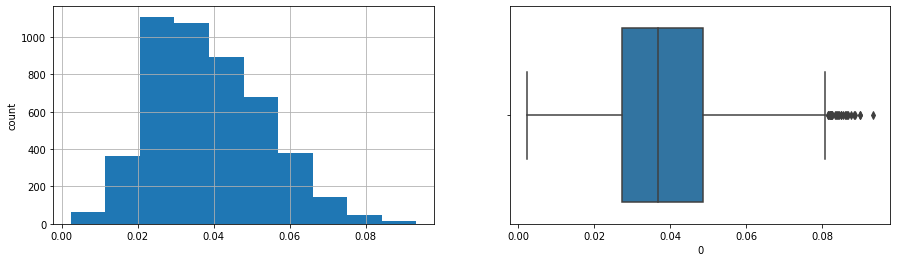

1
Skew : 1.89


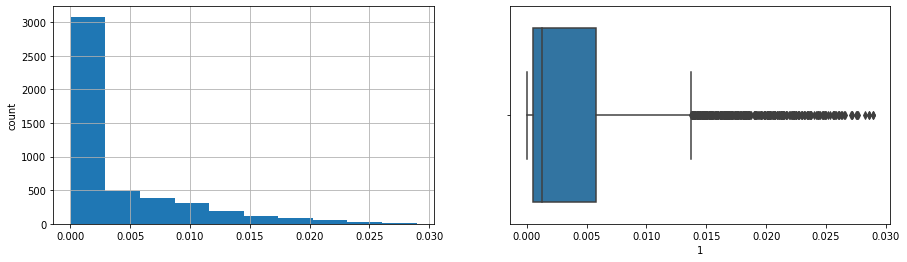

2
Skew : 2.92


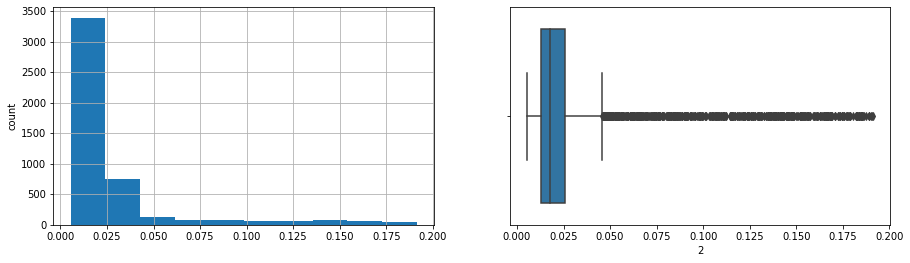

3
Skew : 2.23


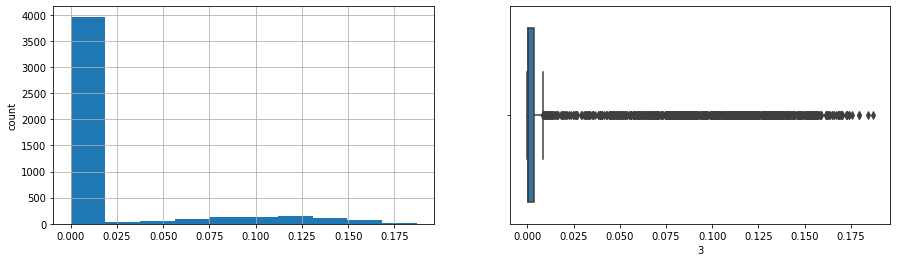

4
Skew : 0.85


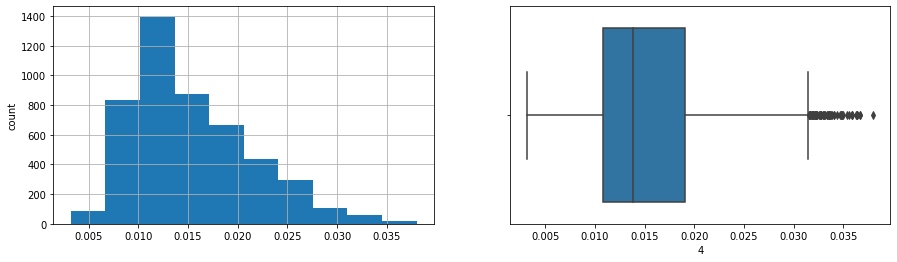

5
Skew : 2.07


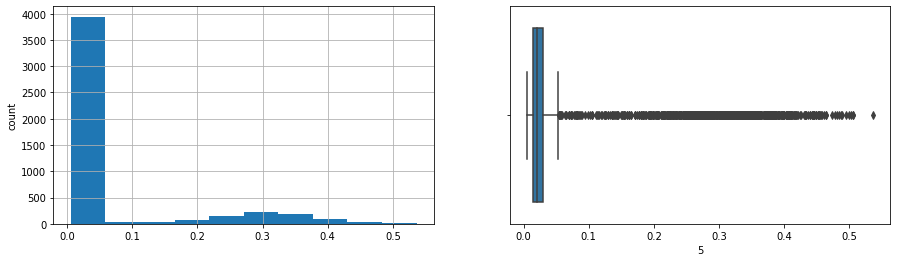

6
Skew : 0.43


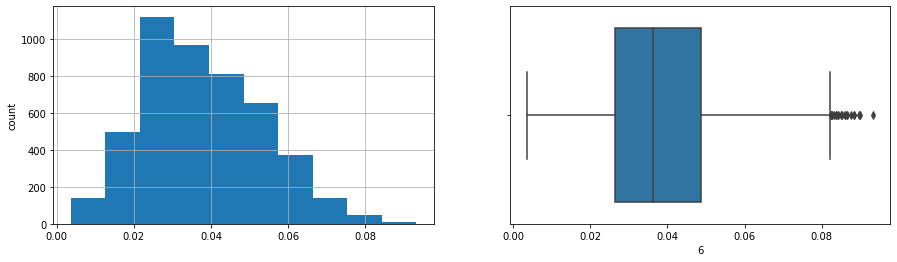

7
Skew : 1.78


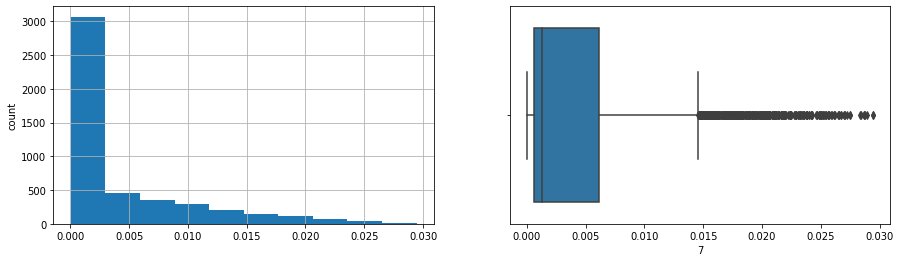

8
Skew : 2.42


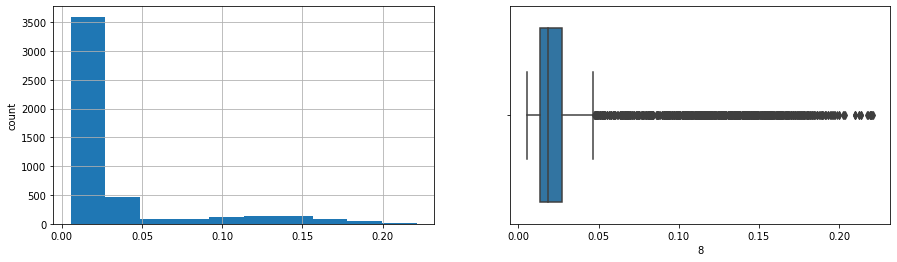

9
Skew : 2.05


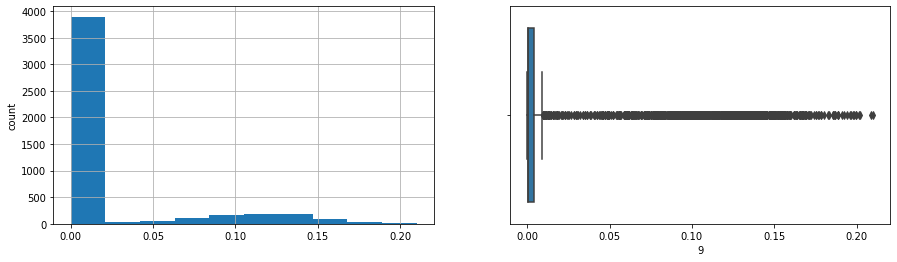

10
Skew : 0.85


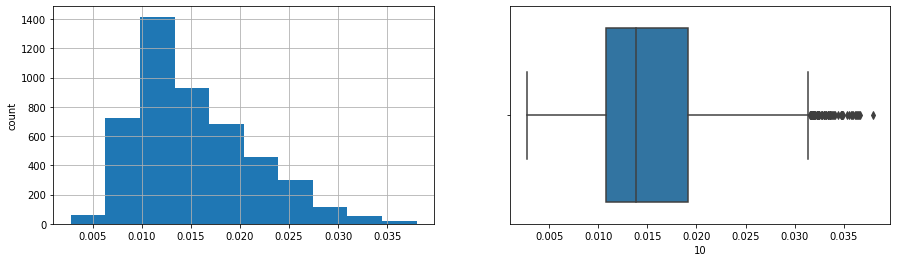

11
Skew : 1.99


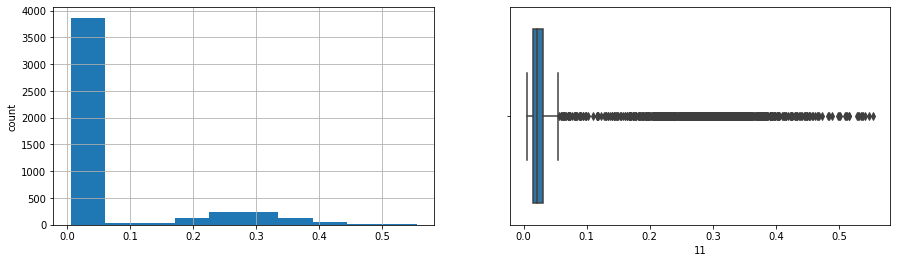

12
Skew : 1.03


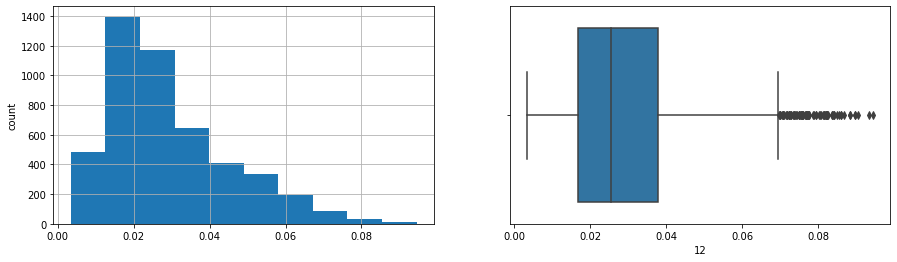

13
Skew : 0.4


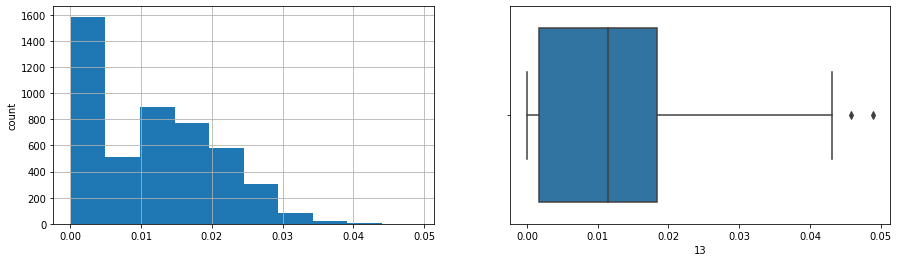

14
Skew : 0.38


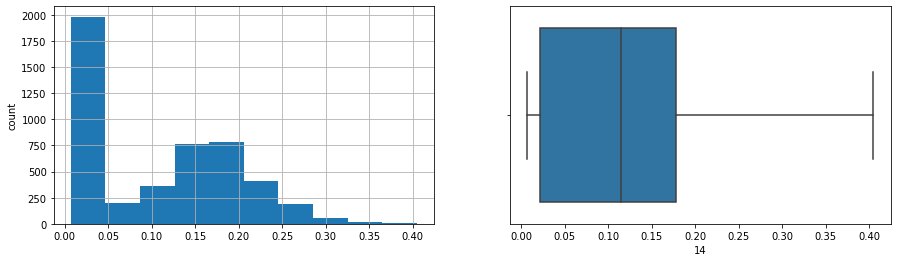

15
Skew : 0.01


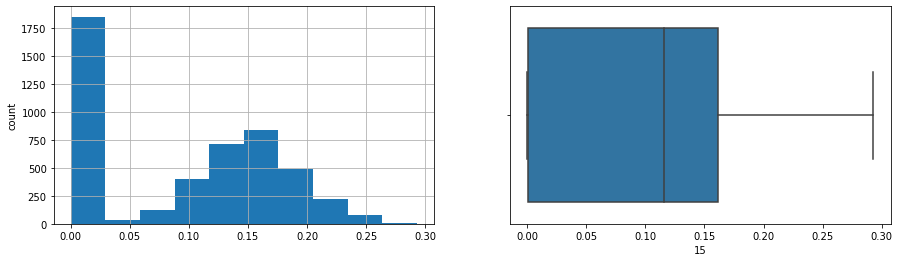

16
Skew : 0.84


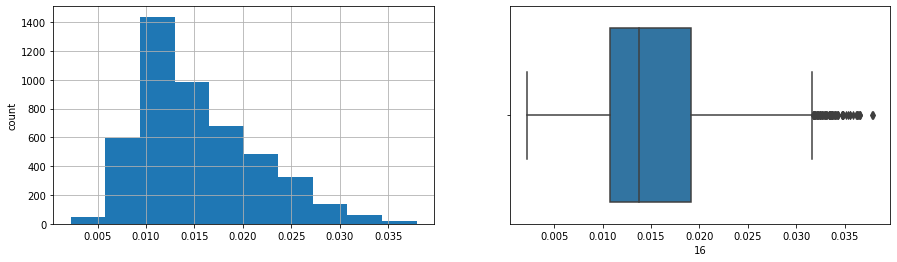

17
Skew : 0.1


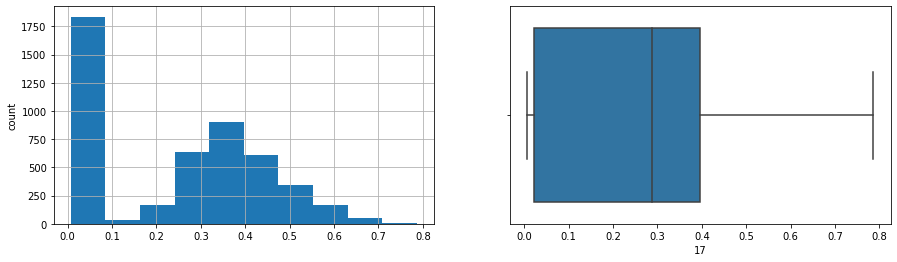

18
Skew : 0.55


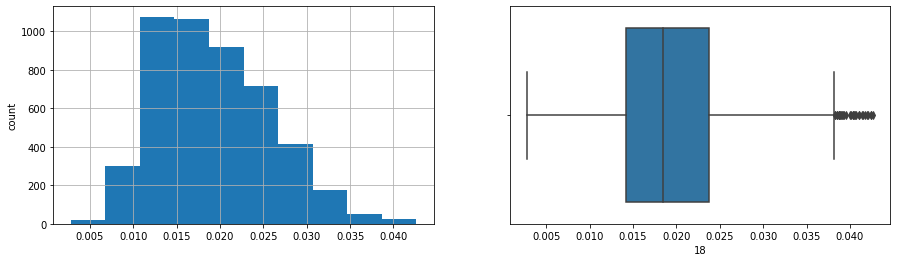

19
Skew : 0.54


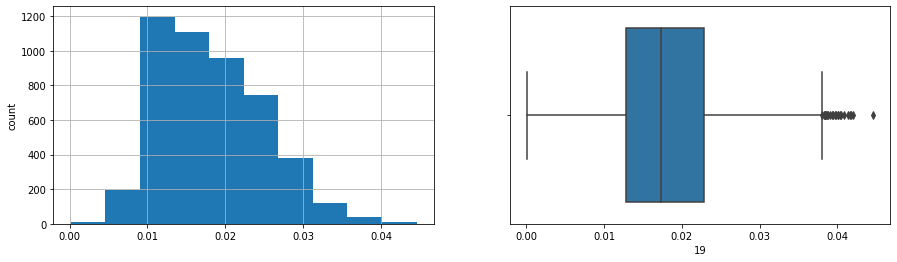

20
Skew : 0.19


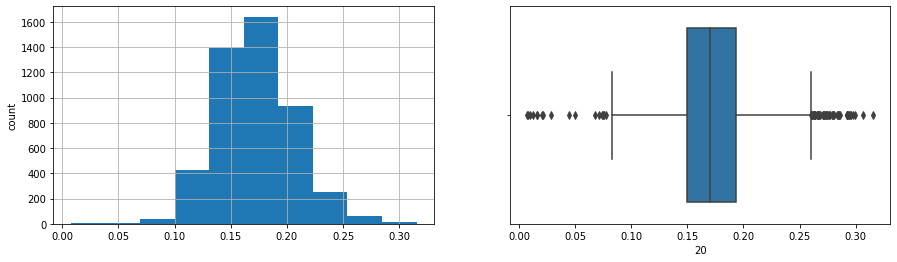

21
Skew : 0.15


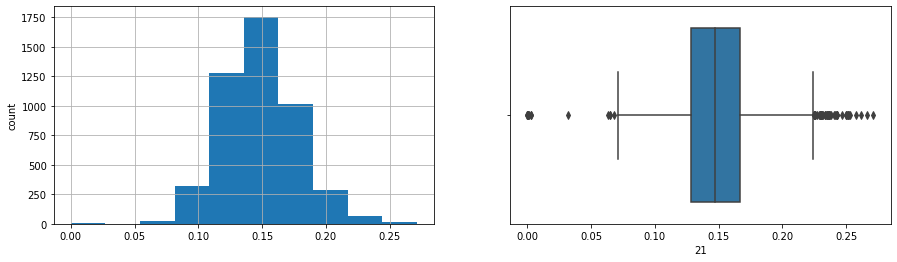

22
Skew : 0.89


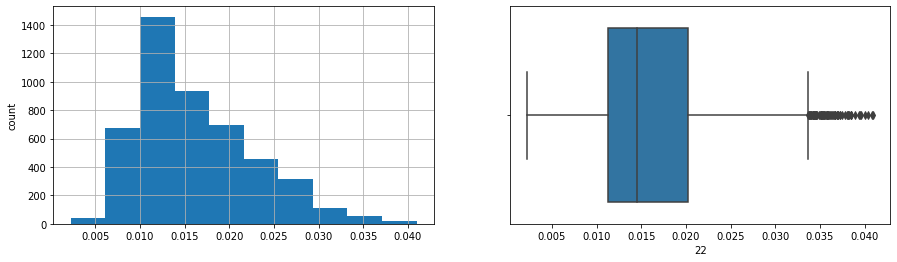

23
Skew : 0.59


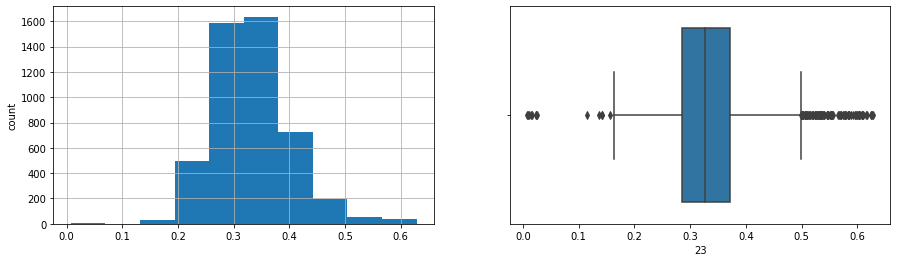

24
Skew : 0.92


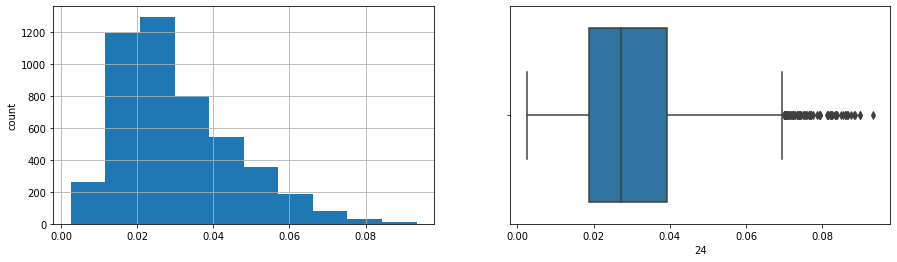

25
Skew : 0.51


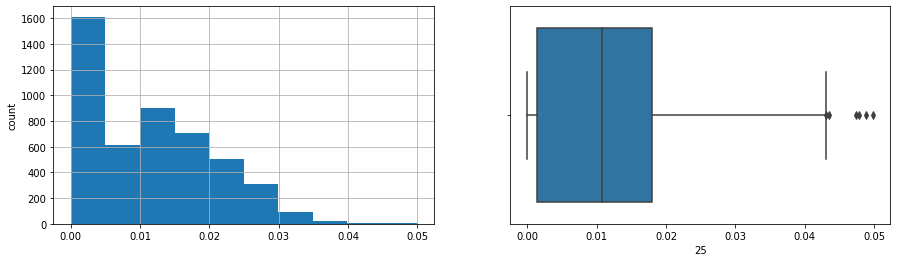

26
Skew : 0.52


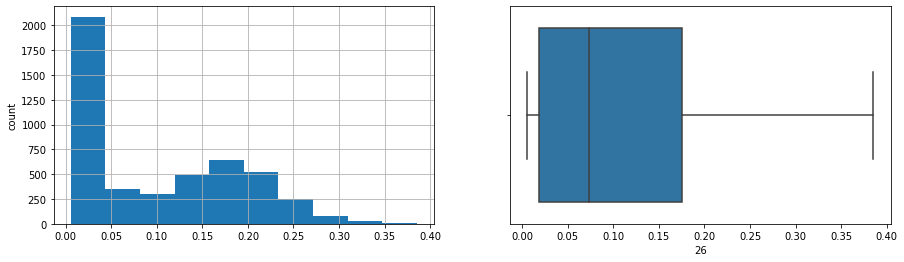

27
Skew : 0.13


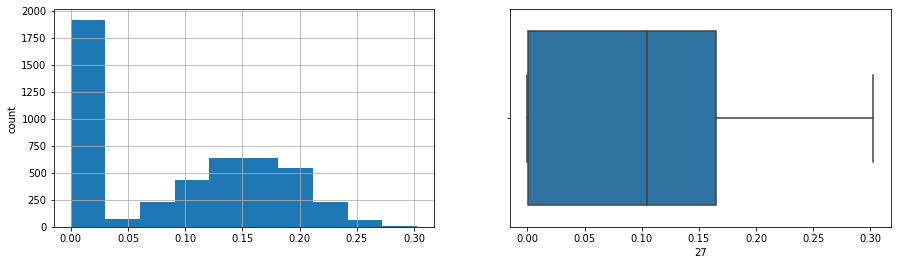

28
Skew : 0.9


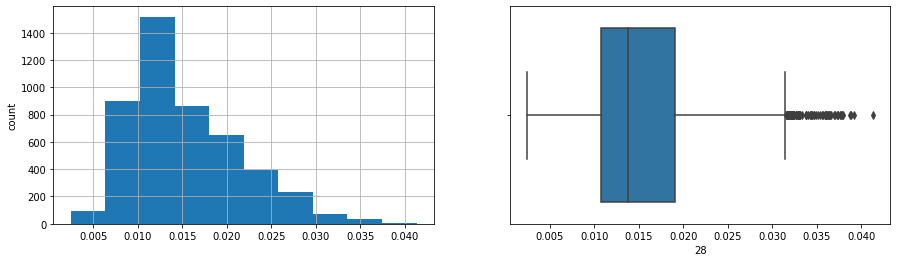

29
Skew : 0.15


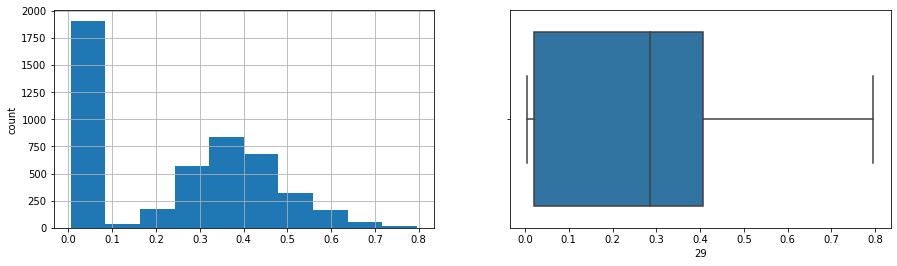

30
Skew : 0.56


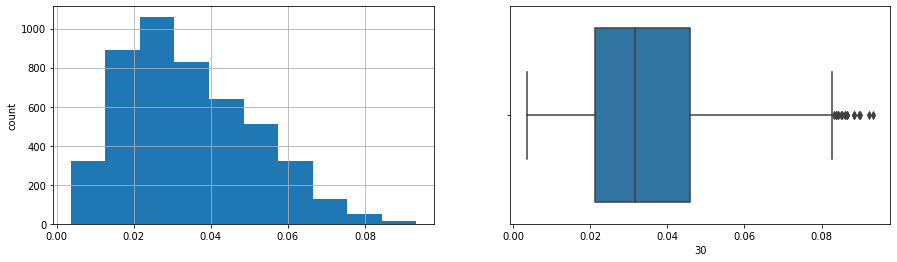

31
Skew : 1.0


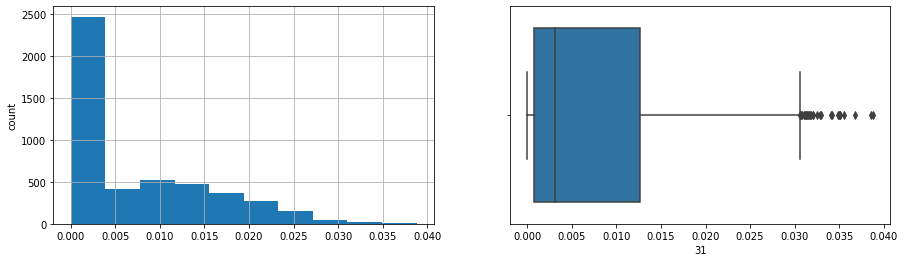

32
Skew : 1.21


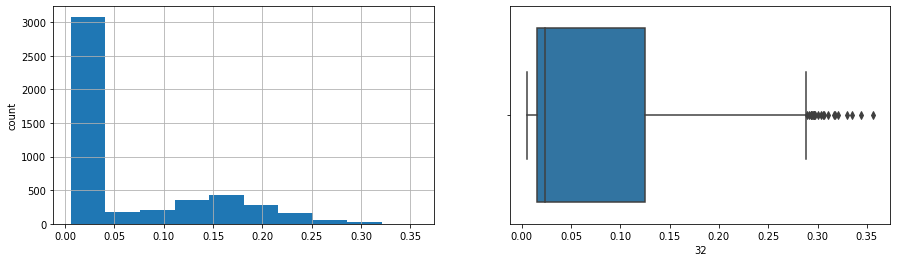

33
Skew : 0.87


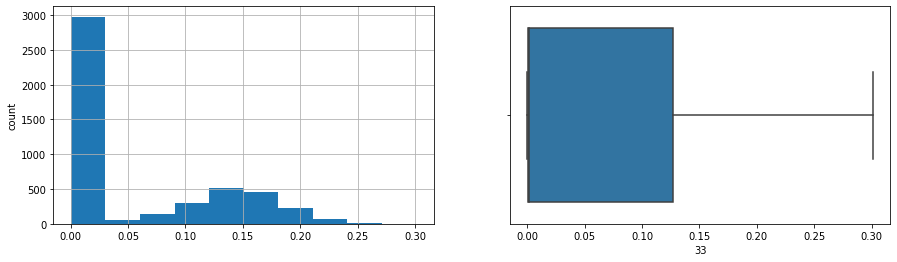

34
Skew : 0.84


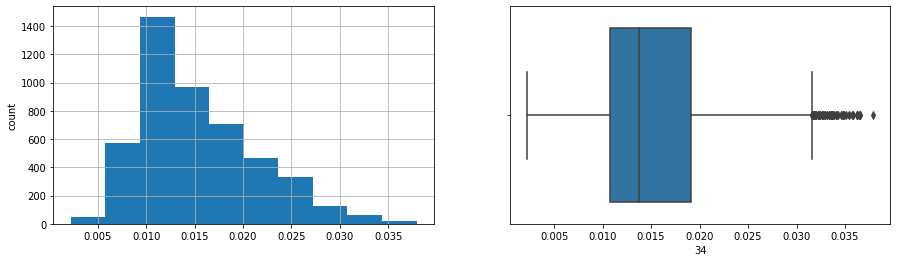

35
Skew : 0.89


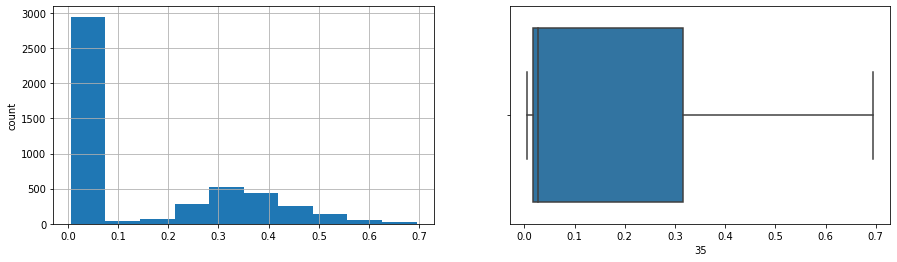

36
Skew : 1.26


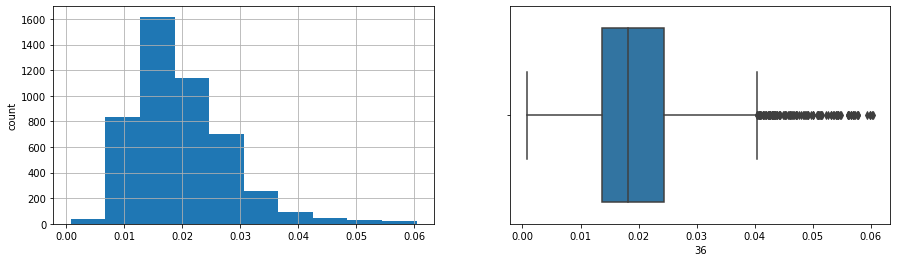

37
Skew : 0.34


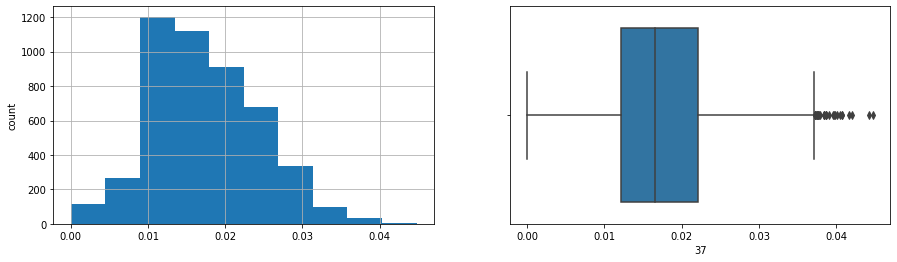

38
Skew : 0.18


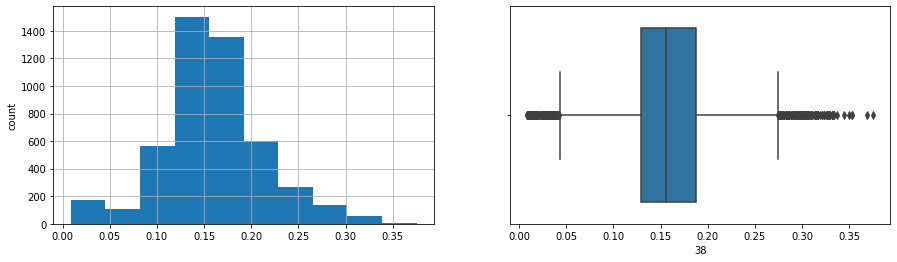

39
Skew : -0.57


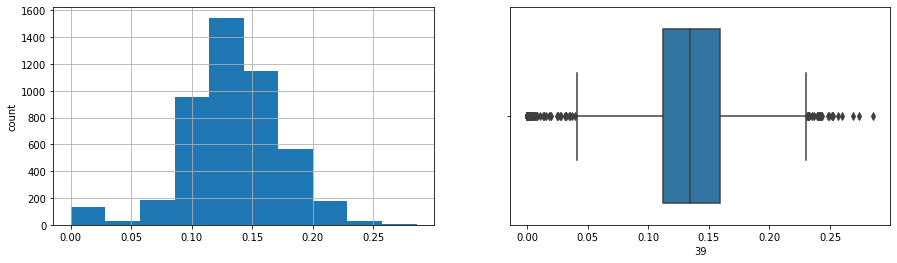

40
Skew : 0.86


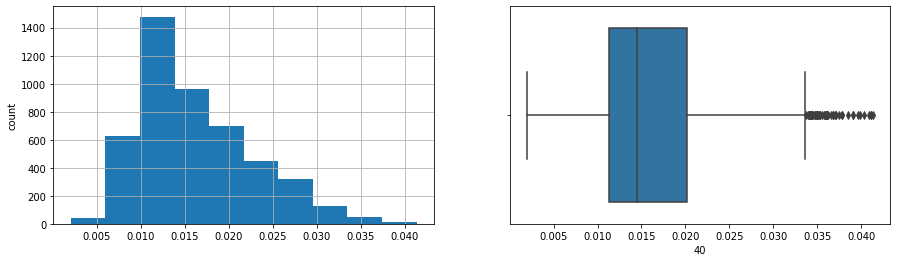

41
Skew : 0.32


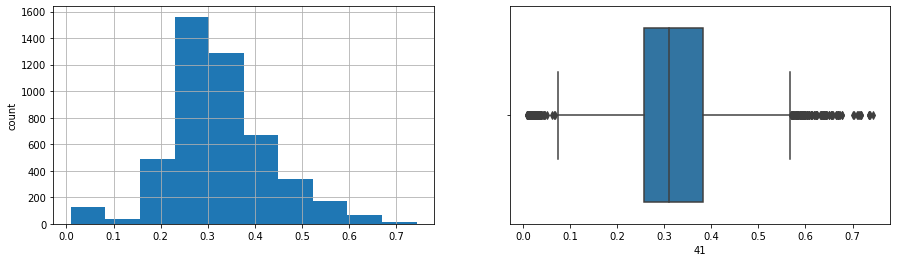

42
Skew : 1.58


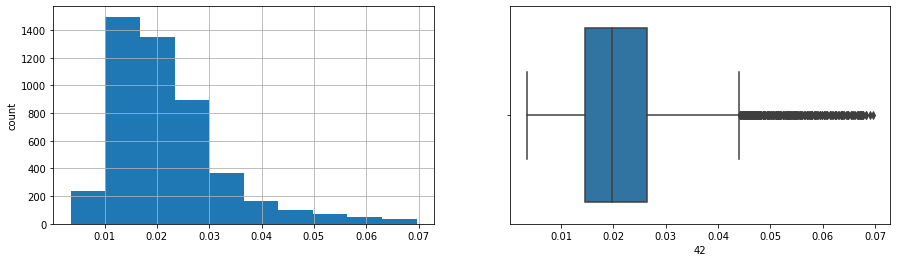

43
Skew : 0.09


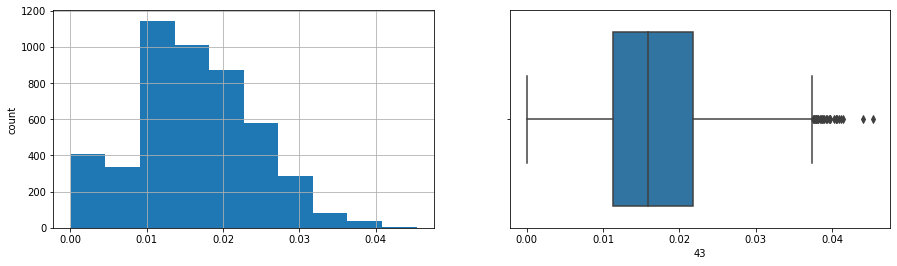

44
Skew : -0.42


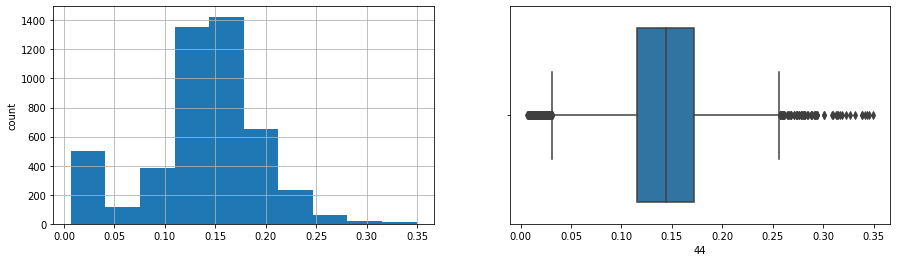

45
Skew : -0.92


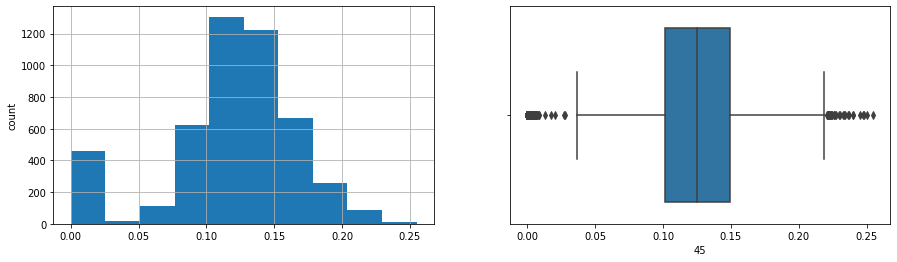

46
Skew : 0.84


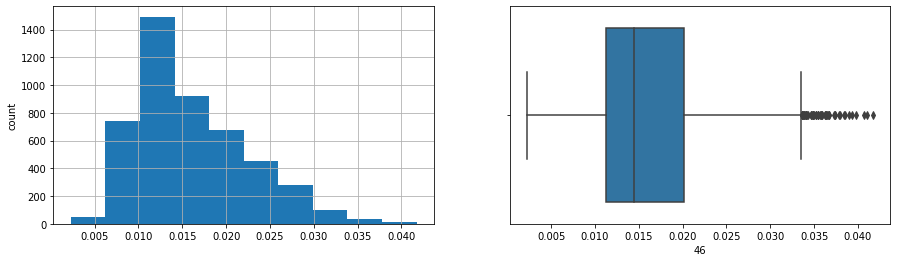

47
Skew : -0.31


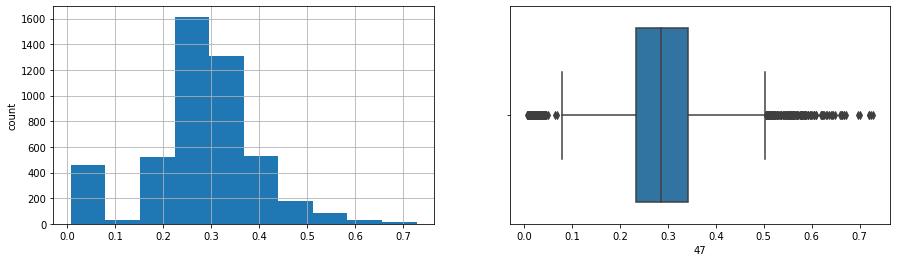

48
Skew : 1.12


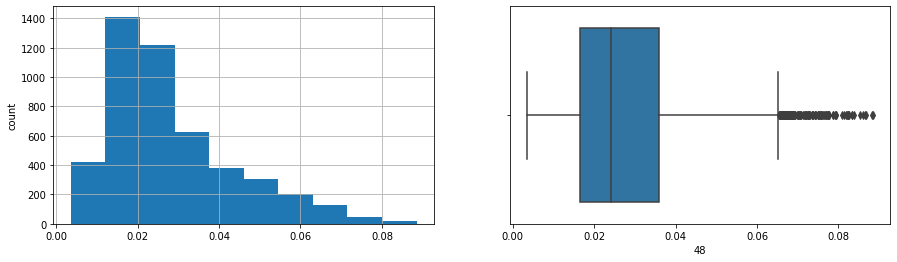

49
Skew : 0.31


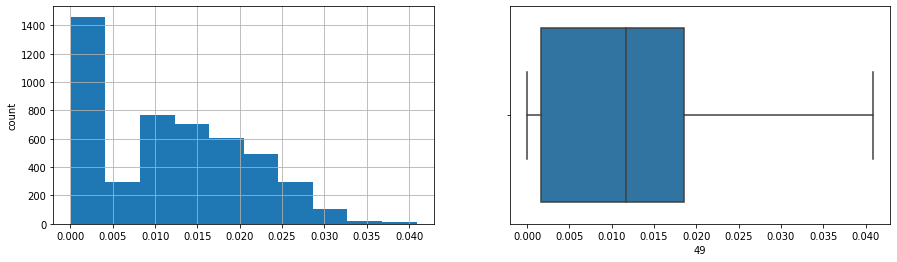

50
Skew : 0.08


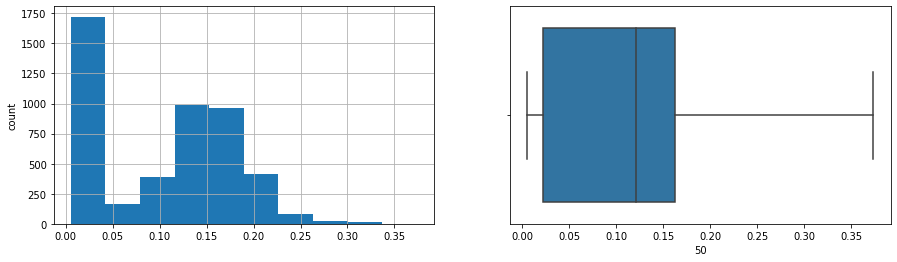

51
Skew : -0.18


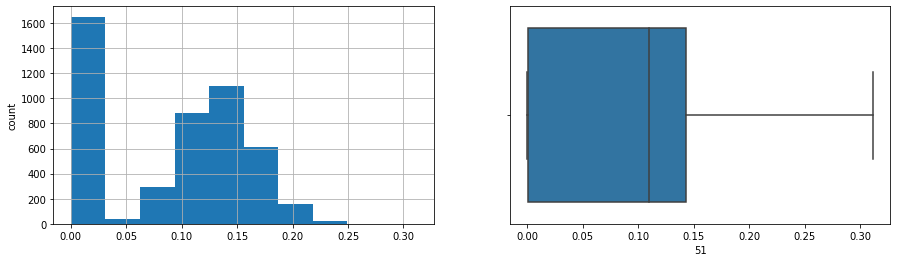

52
Skew : 0.84


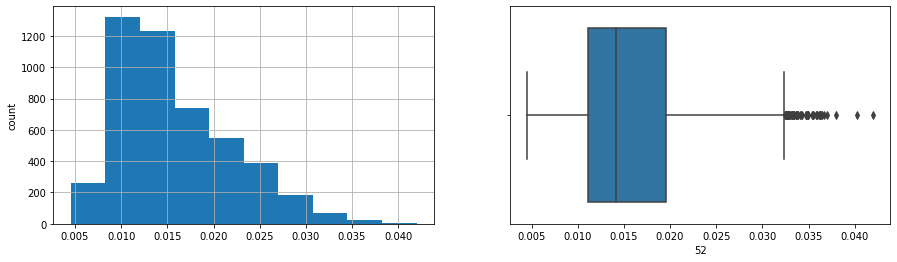

53
Skew : -0.06


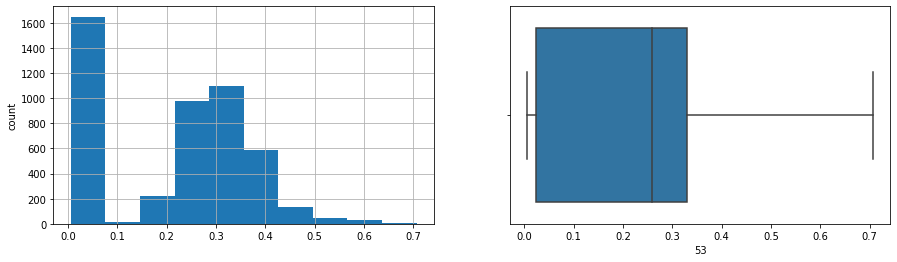

54
Skew : 0.41


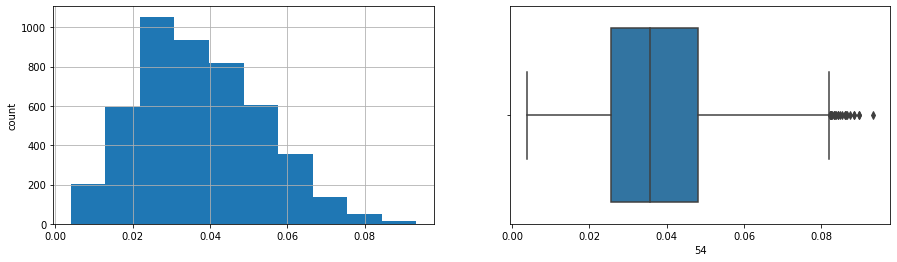

55
Skew : 1.7


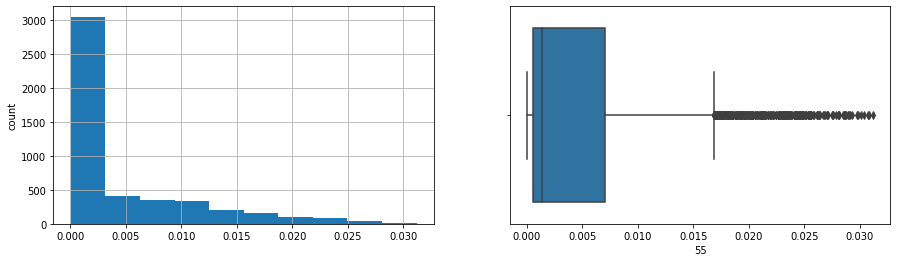

56
Skew : 1.96


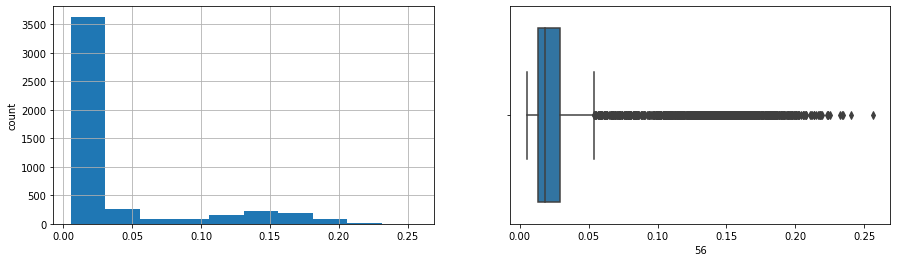

57
Skew : 1.68


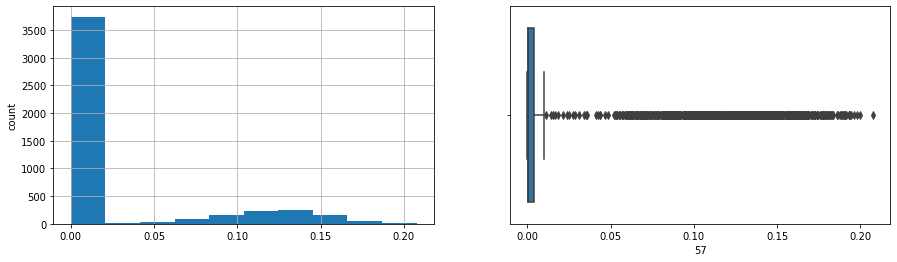

58
Skew : 0.84


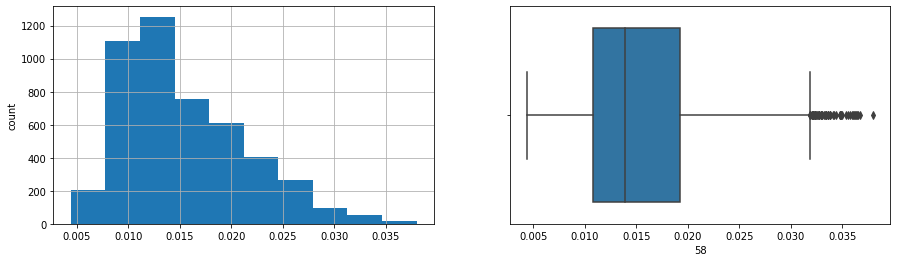

59
Skew : 1.62


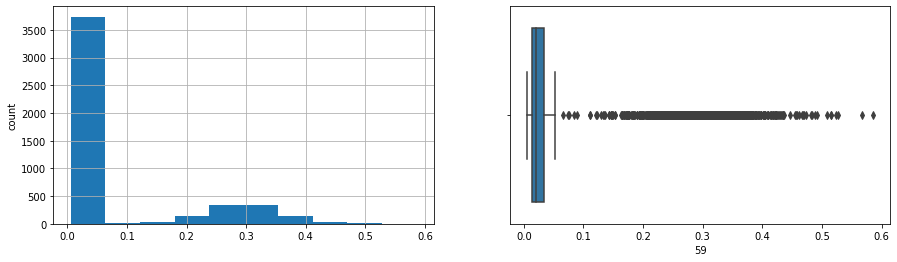

60
Skew : 0.54


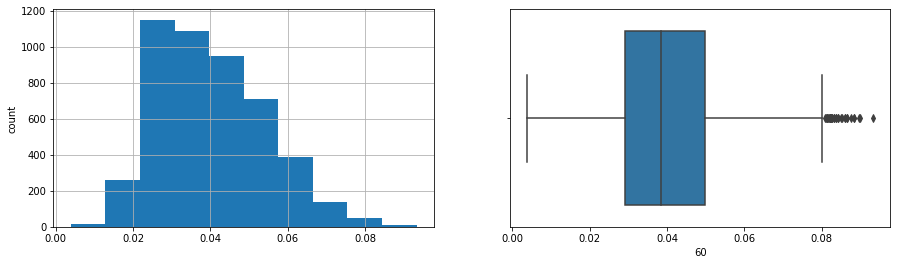

61
Skew : 2.15


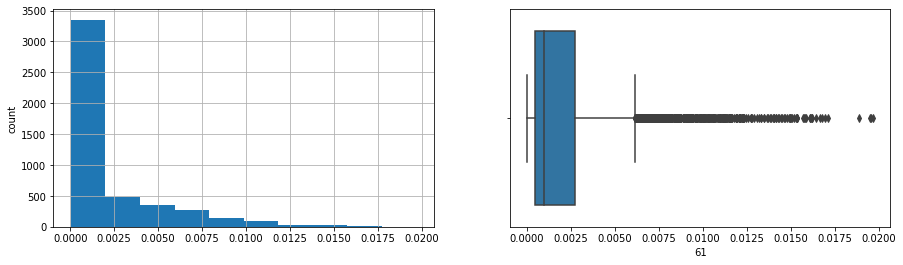

62
Skew : 3.88


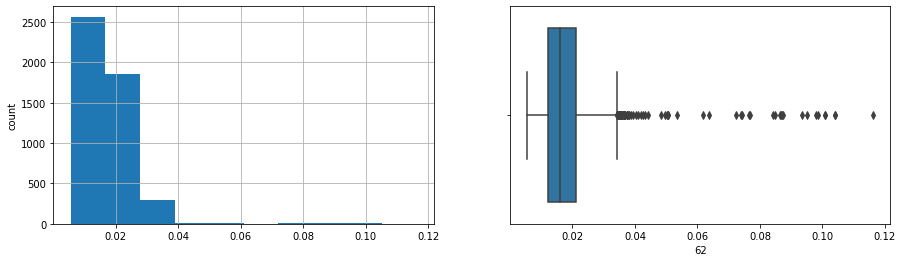

63
Skew : 9.92


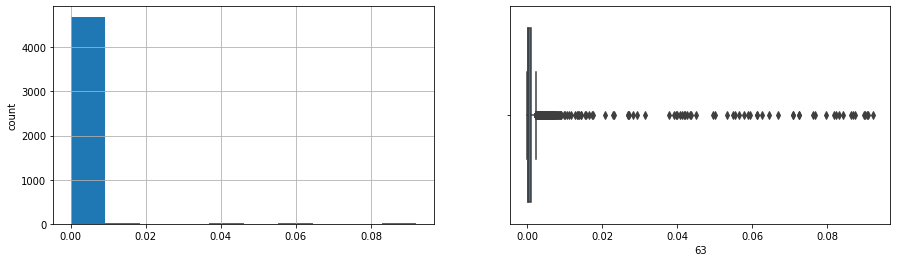

64
Skew : 0.85


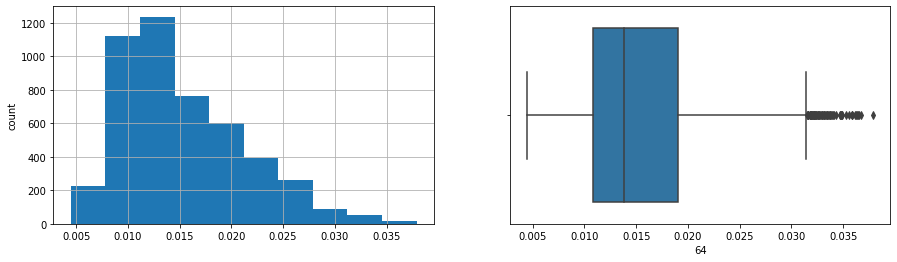

65
Skew : 7.38


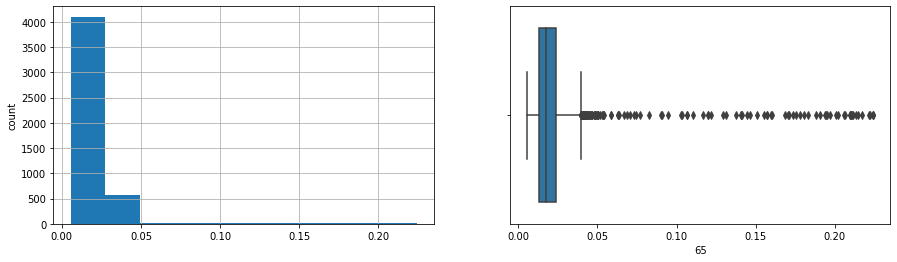

66
Skew : 0.57


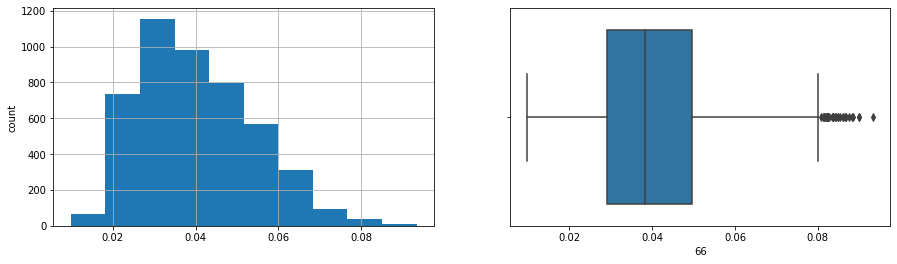

67
Skew : 2.02


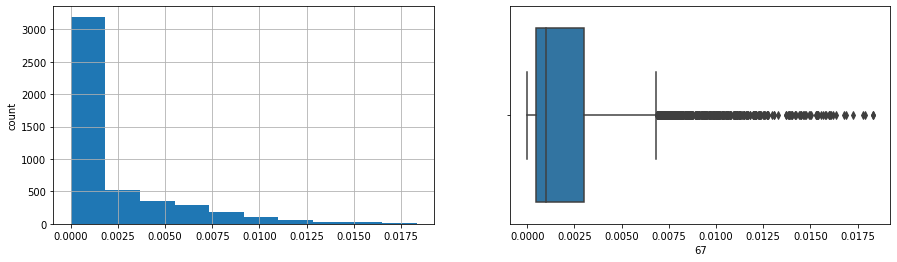

68
Skew : 1.0


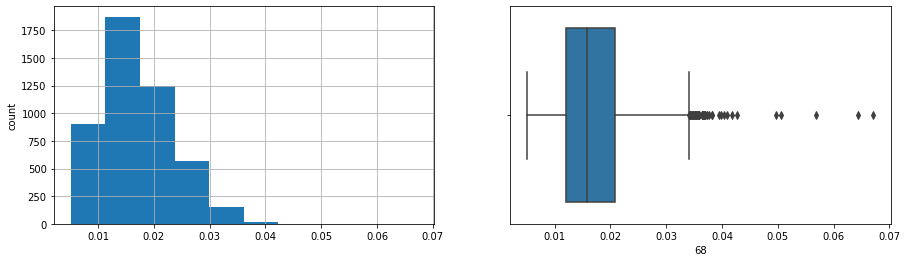

69
Skew : 7.17


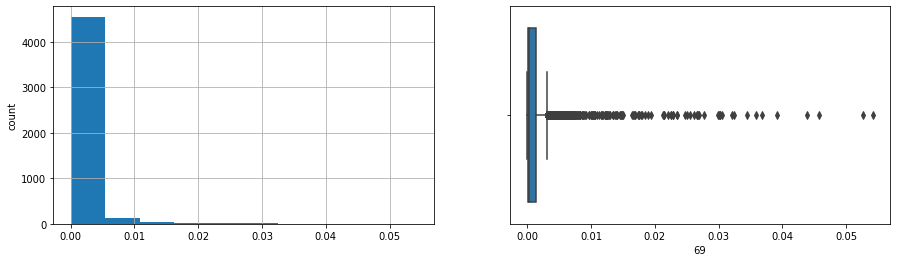

70
Skew : 0.86


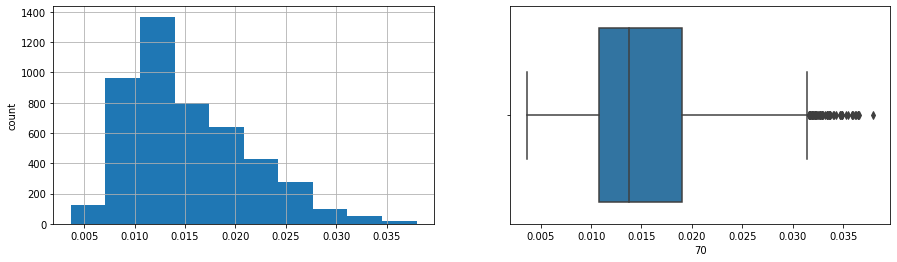

71
Skew : 4.41


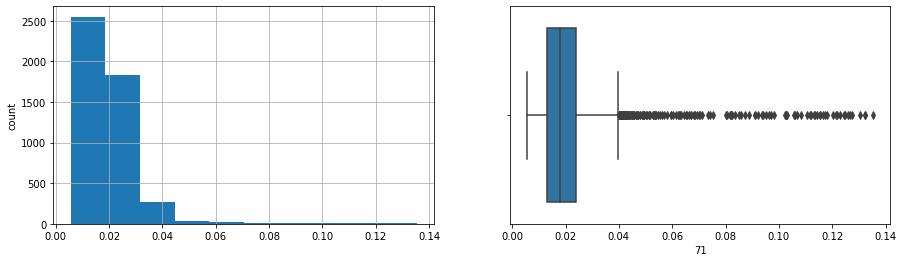

72
Skew : 1.38


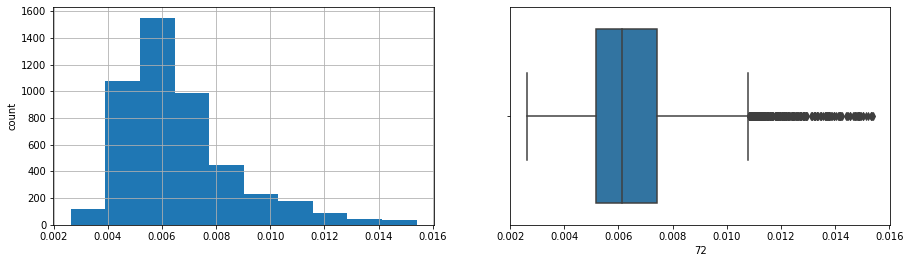

73
Skew : 3.27


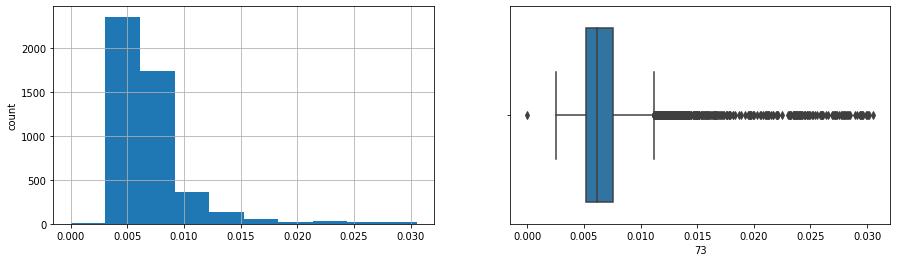

74
Skew : 0.78


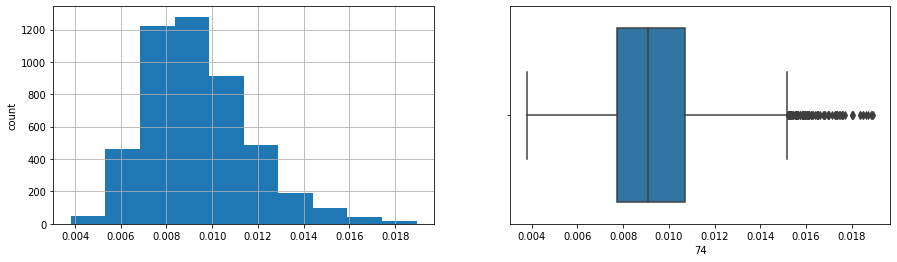

75
Skew : 0.32


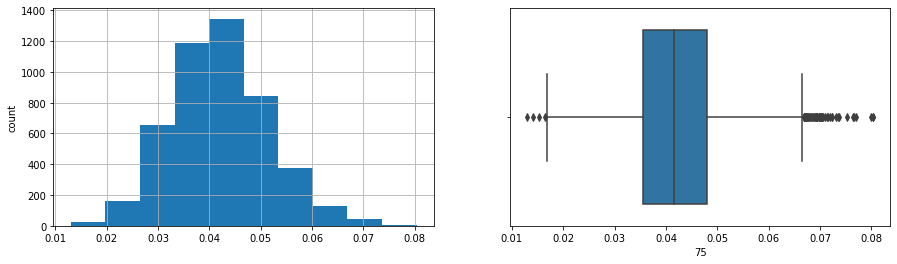

76
Skew : 0.49


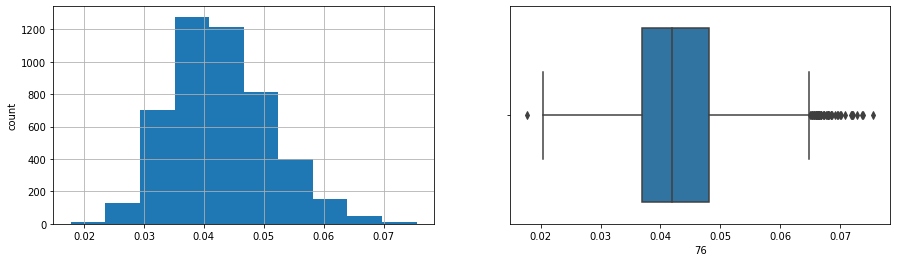

77
Skew : -0.33


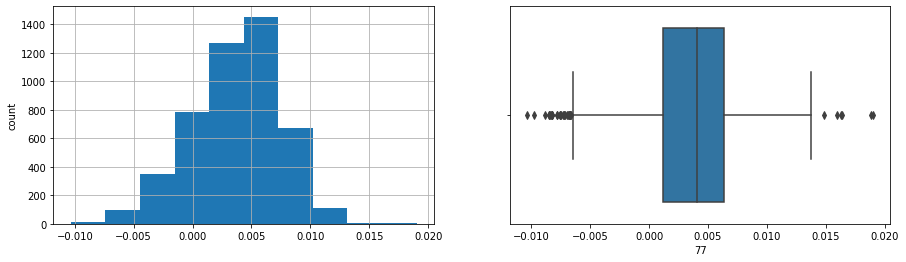

78
Skew : 1.04


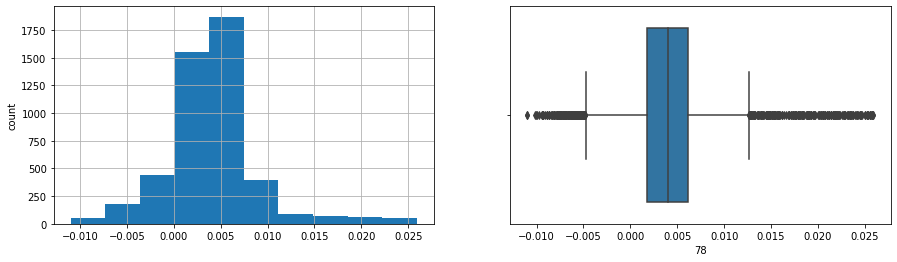

79
Skew : 1.34


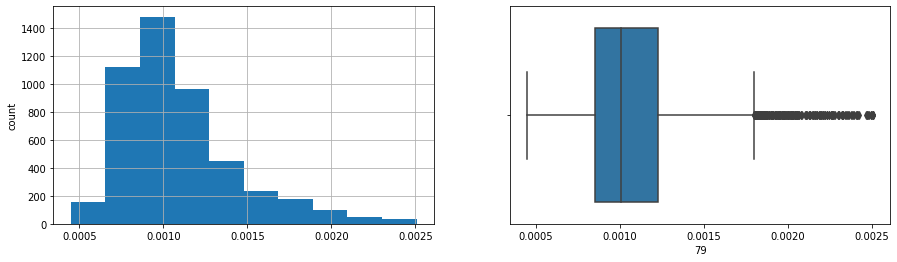

80
Skew : 0.46


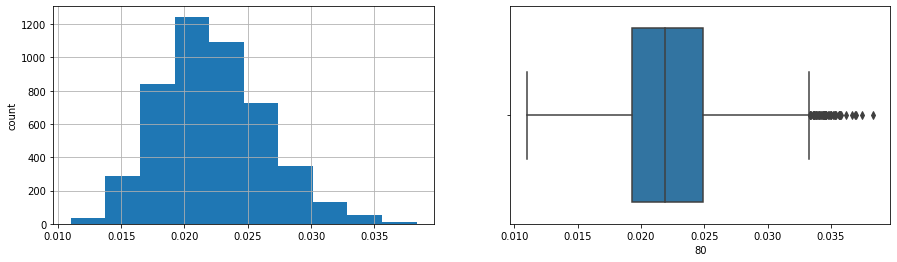

81
Skew : 0.44


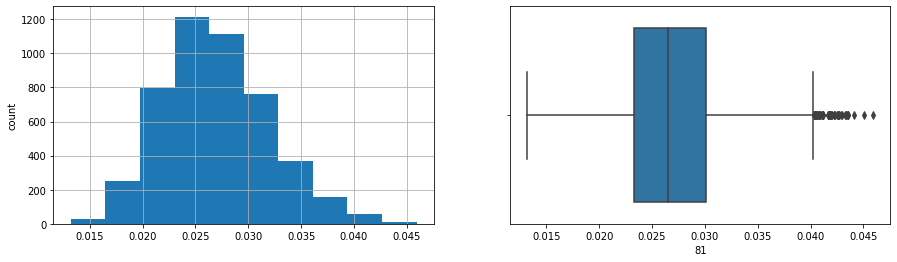

82
Skew : 0.4


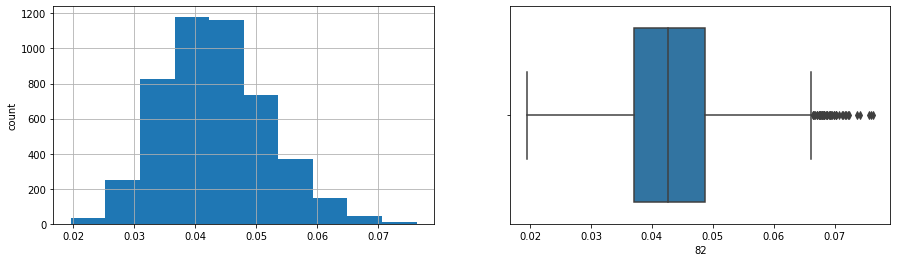

label
Skew : -0.07


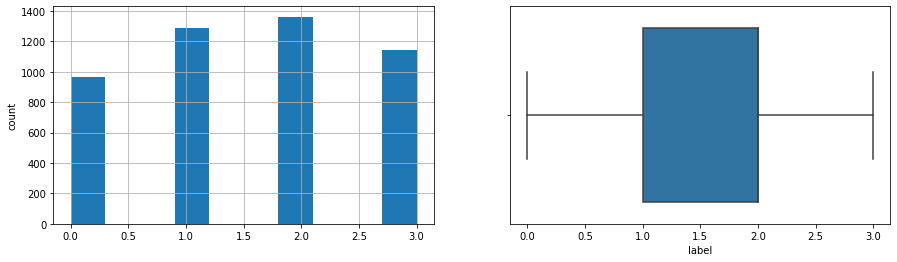

In [ ]:
#Boxplot and histogram after outlier removal
#
df_full = pd.DataFrame(df)
for col in df_full.columns:
    print(col)
    print('Skew :',round(df_full[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_full[col].hist()
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df_full)
    plt.show()

## Feature Selection using Select K Best

In [ ]:
# https://www.freecodecamp.org/news/feature-engineering-and-feature-selection-for-beginners/

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


f_classif_features = SelectKBest(f_classif,k=31) # selecting k as 31 
X_best_features = f_classif_features.fit_transform(df.drop(['label'],axis=1), df['label'])


print("Original Features  : ",df.drop(['label'],axis=1).shape )
print("Reduced Features  : ",X_best_features.shape)


Original Features  :  (4762, 83)
Reduced Features  :  (4762, 31)


In [ ]:
f_classif_features.scores_

array([1.44693352e+03, 2.61165979e+02, 5.74135934e+01, 2.75722418e+01,
       2.07604245e+03, 5.07298028e+01, 1.15934063e+03, 2.90334289e+02,
       3.32206390e+01, 5.09051114e+01, 2.11502451e+03, 7.14753659e+01,
       2.99023410e+02, 2.35710966e+02, 1.14740629e+01, 1.73984375e+01,
       1.72844378e+03, 1.06798759e+01, 1.73969758e+03, 2.04338969e+03,
       1.46283872e+02, 1.40639312e+02, 2.22444952e+03, 5.96068770e+01,
       5.12305478e+02, 1.05901192e+02, 1.33209922e+01, 6.47969401e+00,
       1.70227575e+03, 5.52172711e+00, 5.59084721e+02, 1.70374766e+02,
       4.22459475e+00, 2.14952457e+01, 1.93775432e+03, 2.50940373e+01,
       6.26270671e+02, 1.46059396e+03, 1.75189146e+01, 1.97367315e+01,
       2.14920035e+03, 1.45015672e-01, 4.42965858e+02, 8.46094985e+02,
       7.65742024e+00, 9.61851791e+00, 2.23833738e+03, 3.75079772e-01,
       4.26277621e+02, 2.32497827e+02, 2.83074796e+00, 7.22505649e+00,
       2.22138081e+03, 1.64497027e+01, 1.13185303e+03, 2.35431198e+02,
      

In [ ]:
f = f_classif_features.get_support(31) # top 31 features
x_def_1 = df_feat.drop('y',axis=1)
# finding the columns using the index
X_new = x_def_1[x_def_1.columns[f]]

features_column_name = X_new.columns

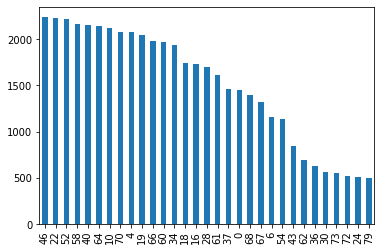

<Figure size 720x576 with 0 Axes>

In [ ]:
feat_imp = pd.Series(f_classif_features.scores_)

feat_imp.nlargest(31).plot(kind='bar')

plt.figure(figsize=(10,8))
plt.show()

In [ ]:
features_column_name

Index(['mean RR ms -I', 'min HR beats/min -I', 'mean RR ms -II',
       'min HR beats/min -II', 'min HR beats/min -III', 'mean RR ms -aVF',
       'STD RR/SDNN ms -aVF', 'min HR beats/min -aVF', 'mean RR ms -aVR',
       'min HR beats/min -aVR', 'mean RR ms -aVL', 'min HR beats/min -aVL',
       'mean RR ms -V1', 'STD RR/SDNN ms -V1', 'min HR beats/min -V1',
       'STD RR/SDNN ms -V2', 'min HR beats/min -V2', 'min HR beats/min -V3',
       'mean RR ms -V4', 'min HR beats/min -V4', 'mean RR ms -V5',
       'STD RR/SDNN ms -V5', 'mean HR beats/min -V5', 'min HR beats/min -V5',
       'mean RR ms -V6', 'STD RR/SDNN ms -V6', 'mean HR beats/min -V6',
       'min HR beats/min -V6', 'VentricularRate', 'AtrialRate', 'QRSCount'],
      dtype='object')

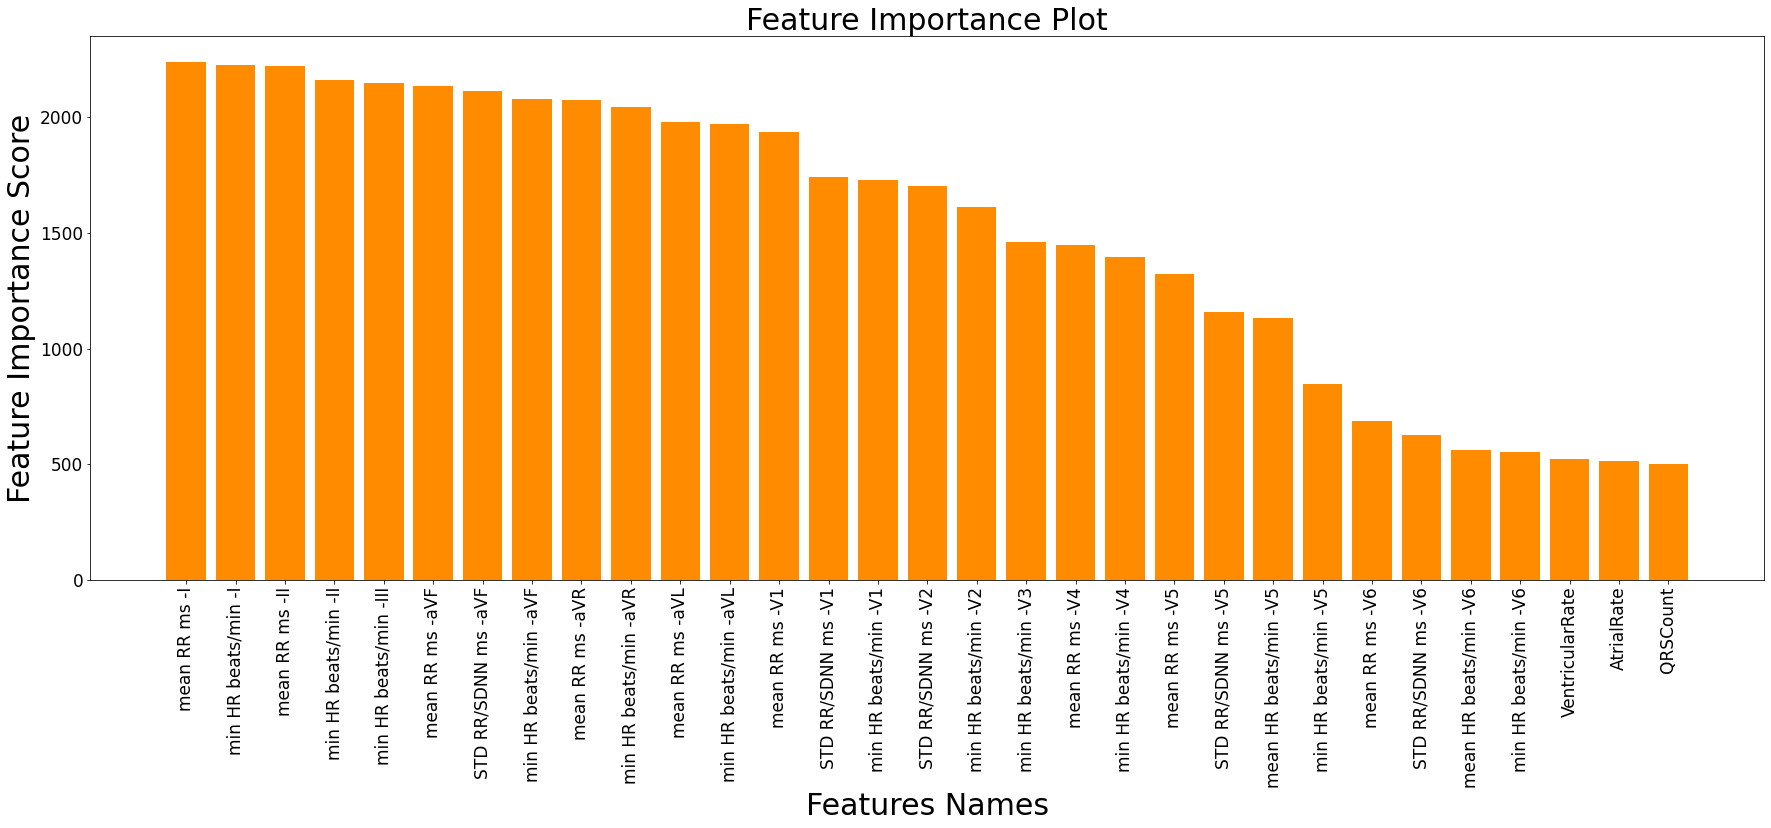

In [ ]:
# https://pythonguides.com/matplotlib-bar-chart-labels/

plt.figure(figsize=(30, 10))
#Bar plot of accuracy of the models
plt.bar(features_column_name,feat_imp.nlargest(31),  color = "darkorange")
plt.xticks(rotation='vertical',fontsize=17)
plt.yticks(fontsize=17)
# bars = plt.barh(features_column_name,feat_imp.nlargest(28),color = "darkorange")
plt.xlabel("Features Names",fontsize=30)
plt.ylabel("Feature Importance Score",fontsize=30)
plt.title("Feature Importance Plot",fontsize=30)
plt.show()

## Train Test Split of the dataset

In [ ]:
# # Dividing the dataset into train and test set
# from sklearn.model_selection import train_test_split

modified_x = []
# X_best_features = np.array(X_best_features)
for i in X_best_features:
  modified_x.append(i.flatten())

y = df['label']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(modified_x,df['label'],random_state=15,shuffle=True,train_size=0.80)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
X_train.shape,X_test.shape

((3809, 31), (953, 31))

## Machine Learning Models

In [ ]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Logistic Regression Model

In [ ]:
## Logistic Regression Model
lrModel = LogisticRegression().fit(X_train, y_train)

# test set prediction
y_pred = lrModel.predict(X_test)
# Train set prediction
y_pred_train = lrModel.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.6977964323189927
Training accuracy  0.7345760042005776


## Hyper parameter tuning of LR model

In [ ]:
# Hyperparameter tuning for LR model
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

penaltyParams = ['l1', 'l2']
C = uniform(loc=0, scale=4)

hyper_parameters_dict = dict(C=C, penalty=penaltyParams)
lrModel = LogisticRegression()


clf = RandomizedSearchCV(lrModel, hyper_parameters_dict, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)


In [ ]:
best_model = clf.fit(modified_x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
# train set prediction
y_pred = best_model.predict(X_test)
# Train set prediction
y_pred_train = best_model.predict(X_train)

In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))

Testing accuracy  0.7806925498426023
Training accuracy  0.7981097400892623


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       0.68      0.62      0.65       185
           1       0.75      0.90      0.82       248
           2       0.86      0.62      0.72       284
           3       0.81      0.97      0.88       236

    accuracy                           0.78       953
   macro avg       0.78      0.78      0.77       953
weighted avg       0.78      0.78      0.77       953

F1 score :  0.773705351650228
Precision score :  0.784958048715665


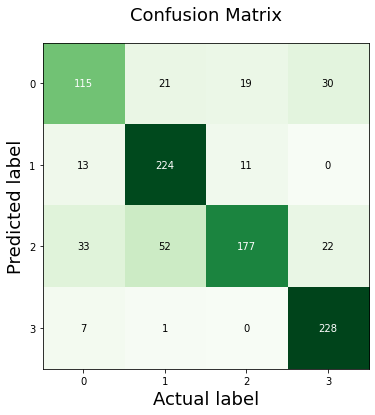

In [ ]:
confusion_matrix_model =  confusion_matrix(y_test, y_pred)

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Decision Tree Model

In [ ]:
# Decision Tree Model
dtModel = DecisionTreeClassifier()
dtModel.fit(X_train,y_train)

# predicting the test dataset
y_pred = dtModel.predict(X_test)

y_pred_train = dtModel.predict(X_train)

In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.8803777544596013
Training accuracy  1.0


## Hyperparameter tuning of DT model

In [ ]:
# Hyperparameter tuning
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV
dtModel = DecisionTreeClassifier()

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

best_model = RandomizedSearchCV(dtModel,
                        param_distributions=params,
                        n_iter=2,
                        cv=3,
                        n_jobs=-1,
                        )

best_model_dt = best_model.fit(modified_x, y)

In [ ]:
best_model_dt.best_params_

{'min_samples_leaf': 20, 'max_depth': 20, 'criterion': 'entropy'}

In [ ]:
# predicting the test dataset
y_pred = best_model_dt.predict(X_test)

y_pred_train = best_model_dt.predict(X_train)

In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.9213011542497377
Training accuracy  0.9385665529010239


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       185
           1       0.95      0.91      0.93       248
           2       0.90      0.92      0.91       284
           3       0.91      0.95      0.93       236

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953

F1 score :  0.9213342139924636
Precision score :  0.9219001787341019


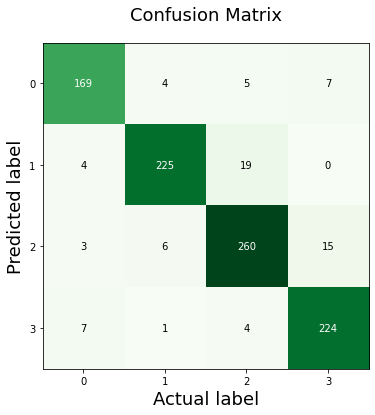

In [ ]:
# Confusion matrix
confusion_matrix_model =  confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Support Vector Classifier

In [ ]:
# Support vector machine classifier
svc_model = SVC()
svc_model.fit(X_train,y_train)

y_pred = svc_model.predict(X_test)

y_pred_train = svc_model.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))

Testing accuracy  0.9055613850996852
Training accuracy  0.928065108952481


## Hyperparameter tuning of SVC

In [ ]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svm_best_model = RandomizedSearchCV(svc_model, param_distributions = param_grid, n_iter = 20, n_jobs = 4, cv = 3)
svm_best_model.fit(modified_x, y)
svm_best_model.cv_results_

y_pred = svm_best_model.predict(X_test)

y_pred_train = svm_best_model.predict(X_train)

# Hyperparameter tuning of SVC
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.pipeline import Pipeline
#
# param_list = {"C": uniform(2, 10),
#              "gamma": uniform(0.1, 1)}
#
# svm_best_model = RandomizedSearchCV(svc_model, param_distributions = param_list, n_iter = 15, n_jobs = 2, cv = 5)
# svm_best_model.fit(modified_x, y)
# svm_best_model.cv_results_
#
# y_pred = svm_best_model.predict(X_test)
#
# y_pred_train = svm_best_model.predict(X_train)




In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))

Testing accuracy  0.9045120671563484
Training accuracy  0.9230769230769231


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       185
           1       0.90      0.93      0.91       248
           2       0.94      0.84      0.88       284
           3       0.90      0.95      0.93       236

    accuracy                           0.90       953
   macro avg       0.90      0.91      0.90       953
weighted avg       0.91      0.90      0.90       953

F1 score :  0.9040668620025137
Precision score :  0.9058896713786041


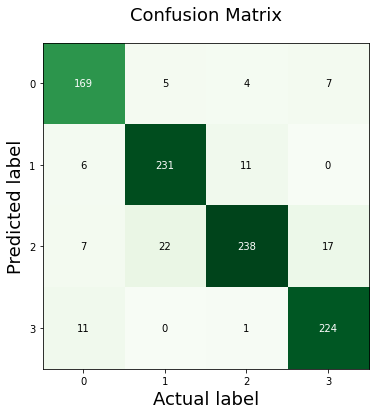

In [ ]:
# Confusion matrix
confusion_matrix_model =  confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest classifier

In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier(n_estimators=100)

#fitting the data
rfc_model.fit(X_train, y_train)

#predicting
y_pred = rfc_model.predict(X_test)


y_pred_train = rfc_model.predict(X_train)

<ipython-input-227-68aaac401a8b>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train, y_train)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.9265477439664218
Training accuracy  1.0


## Hyperparameter tuning of RFC

In [ ]:
# Hyperparameter tuning

from scipy.stats import randint
# from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

rfc_model=RandomForestClassifier()

parameters = {
    "max_depth": [3, 5, 10, None],
    "n_estimators": [100, 200, 300, 400, 500],
    "max_features": randint(1, 3),
    "criterion": ["gini", "entropy"],
    "bootstrap": [True, False],
    "min_samples_leaf": randint(1, 4)
}

# parameters = {
#     "max_depth": [3, 5, 10, None],
#     "n_estimators": [100, 200, 300, 400, 500]
# }

optimal_model = RandomizedSearchCV(rfc_model,
                        param_distributions=parameters,
                        n_iter=2,
                        cv=3,
                        n_jobs=-1,
                        )

optimal_model.fit(modified_x, y)



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f221e625c70>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f221a0c6370>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
optimal_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [ ]:
rfc_model=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=None,max_features=1,min_samples_leaf=2,n_estimators=200)
rfc_model.fit(X_train,y_train)
#predicting
y_pred = rfc_model.predict(X_test)
y_pred_train = rfc_model.predict(X_train)

<ipython-input-231-f68653d3a7a1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_model.fit(X_train,y_train)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.925498426023085
Training accuracy  0.9831976896823313


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       185
           1       0.92      0.93      0.92       248
           2       0.93      0.89      0.91       284
           3       0.93      0.96      0.94       236

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953

F1 score :  0.9253592316073689
Precision score :  0.9256341863805885


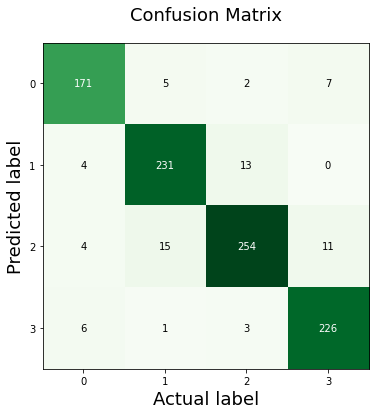

In [ ]:
# Confusion matrix
confusion_matrix_model =  confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Saving Random forest Model

In [ ]:
# https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle
import pickle as pkl
# filename= 'rfc_model.sav'
# pkl.dump(clf, open(filename, 'wb'))

# pkl.dump(rfc_model, open('rfc_modelA.pkl', 'wb'))
from joblib import Parallel, delayed
import joblib

joblib.dump(clf, 'rf_modelA.pkl')
rf_from_joblib = joblib.load('rf_modelA.pkl')


# XGBoost Classifier

In [ ]:
#XG Boost classifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

#fitting the data
xgb_clf.fit(X_train, y_train)

#predicting
y_pred = xgb_clf.predict(X_test)


y_pred_train = xgb_clf.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))

Testing accuracy  0.9233997901364114
Training accuracy  0.9726962457337884


## Hyperparameter tuning of XGBoost

In [ ]:
# Hyperparameter tuning

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb_clf_clf = xgb.XGBClassifier()
random_search = RandomizedSearchCV(xgb_clf_clf, param_distributions=params, n_iter=2, scoring='roc_auc', n_jobs=4, cv=3)

In [ ]:
random_search.fit(X_train, y_train)
random_search.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 4,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [ ]:
xgb_clf_best = xgb.XGBClassifier(subsample=1.0,min_child_weight=1,max_depth=4,gamma=1,colsample_bytree=0.6)
xgb_clf_best.fit(X_train, y_train)

y_pred = xgb_clf_best.predict(X_test)

y_pred_train = xgb_clf_best.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))


Testing accuracy  0.9233997901364114
Training accuracy  0.9805723286951956


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test, y_pred, average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test, y_pred, average='weighted')
print("Precision score : ", precision_score_value)


              precision    recall  f1-score   support

           0       0.92      0.94      0.93       185
           1       0.92      0.93      0.92       248
           2       0.92      0.88      0.90       284
           3       0.93      0.95      0.94       236

    accuracy                           0.92       953
   macro avg       0.92      0.93      0.92       953
weighted avg       0.92      0.92      0.92       953

F1 score :  0.9232057161837416
Precision score :  0.9233724406638302


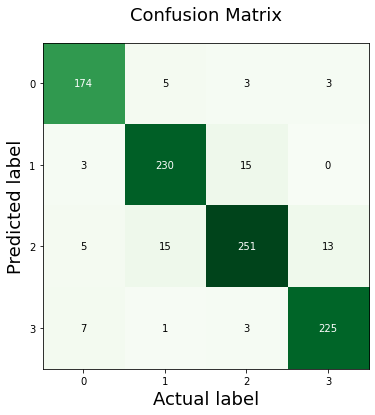

In [ ]:
# Confusion matrix
confusion_matrix_model = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Gradient Boosting Classifier

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

#Gradient Boosting Classifier
gradient_boosting_clf = GradientBoostingClassifier()
gradient_boosting_clf.fit(X_train, y_train)


#predicting
y_pred = gradient_boosting_clf.predict(X_test)


y_pred_train = gradient_boosting_clf.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))

Testing accuracy  0.9223504721930745
Training accuracy  0.9879233394591757


## Hyperparameter tuning of Gradient Boosting Classifier

In [ ]:
# Hyperparameter tuning

import numpy as np

params = {'learning_rate': [0.15, 0.1, 0.05, 0.01], 'n_estimators': [100, 250, 500]}

gradientb_classifier = GradientBoostingClassifier()
random_search_gb = RandomizedSearchCV(gradientb_classifier, param_distributions=params, n_iter=2, scoring='roc_auc',
                                      n_jobs=4, cv=3)


In [ ]:
random_search_gb.fit(X_train, y_train)
random_search_gb.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'n_estimators': 500, 'learning_rate': 0.01}

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01)
gb.fit(X_train, y_train)

#predicting
y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

print("Testing accuracy " ,accuracy_score(y_test,y_pred))

print("Training accuracy " ,accuracy_score(y_train,y_pred_train))

Testing accuracy  0.9181532004197271
Training accuracy  0.9692832764505119


In [ ]:
report = classification_report(y_test, y_pred)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test,y_pred,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test,y_pred,average='weighted')
print("Precision score : ", precision_score_value)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       185
           1       0.90      0.93      0.91       248
           2       0.93      0.88      0.90       284
           3       0.93      0.95      0.94       236

    accuracy                           0.92       953
   macro avg       0.92      0.92      0.92       953
weighted avg       0.92      0.92      0.92       953

F1 score :  0.9179730453359212
Precision score :  0.9183930812776643


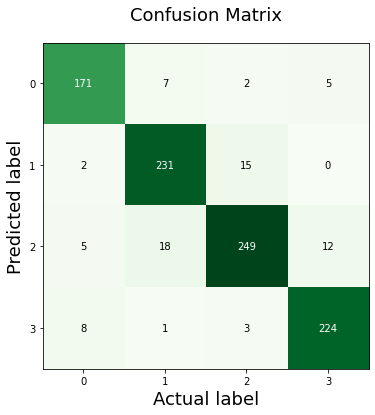

In [ ]:
# Confusion matrix
confusion_matrix_model =  confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Deep learning model CNN+Bi-LSTM (Hybrid Model)

In [ ]:
# Deep learning model CNN and Bi-LSTM (Hybrid Model)


import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.layers import LSTM,Dropout,Dense,TimeDistributed,Conv1D,MaxPooling1D,Flatten,Bidirectional
from keras import regularizers
#from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import tensorflow as tf
import keras
from keras import backend as k
tf.keras.optimizers.Adam()
tf.keras.optimizers.SGD()
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential


In [ ]:
import matplotlib.pyplot as plt
    # create accuracy sublpot
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    # plt.figure(figsize=(24,12))
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    #fig, axs = plt.subplots(2)
    fig.tight_layout(pad=3.0)
    axs[0].plot(history.history["accuracy"], label="train ",color="green")
    axs[0].plot(history.history["val_accuracy"], label="test ",color='blue')
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Plot")

    # create loss sublpot
    axs[1].plot(history.history["loss"], label="train ",color="red")
    axs[1].plot(history.history["val_loss"], label="test ",color='orange')
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss Plot")
    plt.show()

In [ ]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()

y_new = lb.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_best_features,y_new,random_state=15,shuffle=True,train_size=0.80)


X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [ ]:
X_train.shape,X_test.shape

((3809, 31), (953, 31))

In [ ]:
# CNN,Bi-LSTM

model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                          padding='same', input_shape=(31, 1)))
model_cnn_lstm.add(BatchNormalization())

# adding a pooling layer
model_cnn_lstm.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

model_cnn_lstm.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                          padding='same'))
model_cnn_lstm.add(BatchNormalization())
model_cnn_lstm.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

model_cnn_lstm.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                          padding='same'))
model_cnn_lstm.add(BatchNormalization())
model_cnn_lstm.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

model_cnn_lstm.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                          padding='same'))
model_cnn_lstm.add(BatchNormalization())
model_cnn_lstm.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

#
# Bi LSTM Neural network
model_cnn_lstm.add(Bidirectional(LSTM(128, activation='relu')))
model_cnn_lstm.add(Dropout(0.5))
model_cnn_lstm.add(Dense(50, activation='relu'))
model_cnn_lstm.add(Dense(4, activation='softmax'))

model_cnn_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])





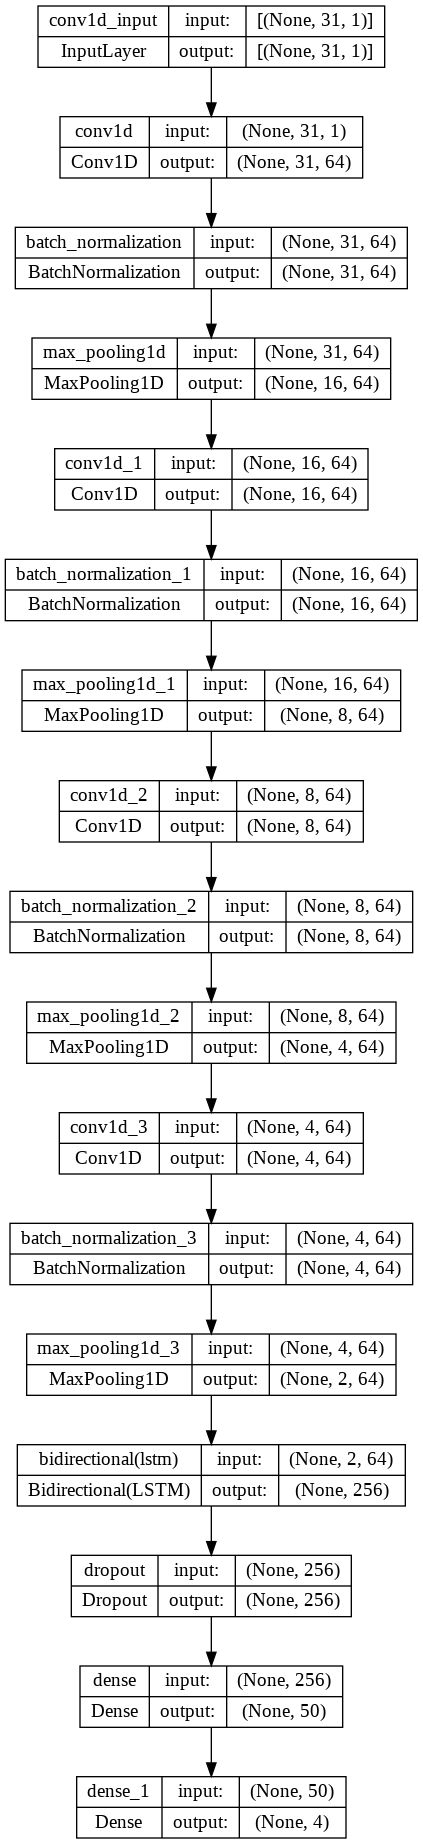

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn_lstm, to_file='model_cnn_lstm_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_cnn_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 31, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 31, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 64)           256       
 hNormalization)                                                 
                                                        

In [ ]:
# fitting the model
history = model_cnn_lstm.fit(X_train, y_train, epochs=70, validation_data=(X_test, y_test))


Epoch 1/70
120/120 [==============================] - 3s 28ms/step - loss: 0.0927 - accuracy: 0.9690 - val_loss: 0.4282 - val_accuracy: 0.9255
Epoch 2/70
120/120 [==============================] - 3s 26ms/step - loss: 0.0838 - accuracy: 0.9719 - val_loss: 0.4642 - val_accuracy: 0.8930
Epoch 3/70
120/120 [==============================] - 3s 25ms/step - loss: 0.0793 - accuracy: 0.9732 - val_loss: 0.4977 - val_accuracy: 0.9150
Epoch 4/70
120/120 [==============================] - 3s 27ms/step - loss: 0.0921 - accuracy: 0.9703 - val_loss: 0.4103 - val_accuracy: 0.9224
Epoch 5/70
120/120 [==============================] - 3s 25ms/step - loss: 0.0871 - accuracy: 0.9716 - val_loss: 0.4201 - val_accuracy: 0.9307
Epoch 6/70
120/120 [==============================] - 3s 25ms/step - loss: 0.0751 - accuracy: 0.9753 - val_loss: 0.5140 - val_accuracy: 0.9370
Epoch 7/70
120/120 [==============================] - 3s 27ms/step - loss: 0.1426 - accuracy: 0.9535 - val_loss: 0.7676 - val_accuracy: 0.8762

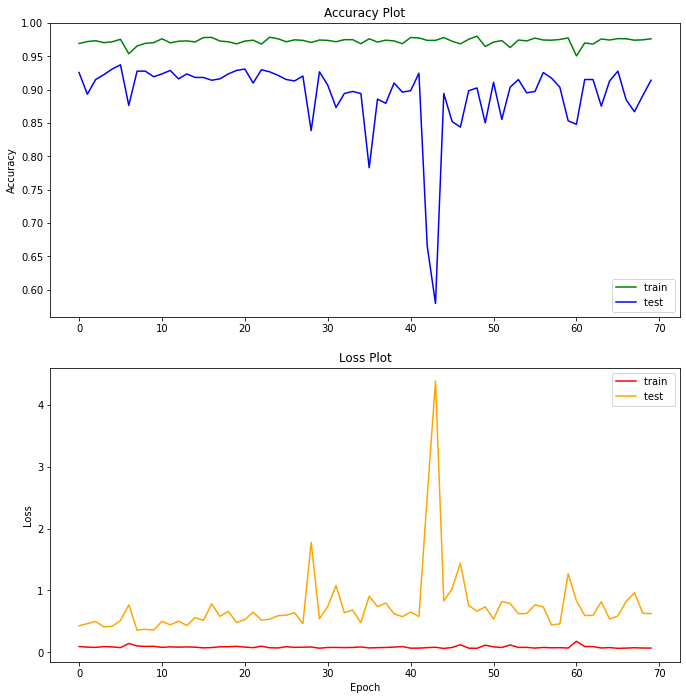

In [ ]:
plot_history(history)

In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

score = model_cnn_lstm.evaluate(X_test,y_test)
print("Testing Accuracy Score is : ",score[1])

score = model_cnn_lstm.evaluate(X_train,y_train)
print("Training Accuracy Score is : ",score[1])

30/30 [==============================] - 0s 8ms/step - loss: 0.6255 - accuracy: 0.9140
Testing Accuracy Score is :  0.9139559268951416
120/120 [==============================] - 1s 9ms/step - loss: 0.0852 - accuracy: 0.9724
Training Accuracy Score is :  0.9724336862564087


### **Hyperparameter Tuning of the CNN+Bi-LSTM Model**

In [ ]:
#Tuning Batch Size and Number of Epochs
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

startTime = time.time()


def create_model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same', input_shape=(31, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


model = KerasClassifier(build_fn=create_model, verbose=0)

#grid search parameters
batch_size = [32, 64, 128]

#epochs parameters
epochs = [30, 50, 70, 90]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train, y_train)

endtime = time.time()
print(endtime)
print("Total time ,", endtime - startTime)

#summary of the result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
meansArray = grid_result.cv_results_['mean_test_score']
stdsArray = grid_result.cv_results_['std_test_score']
paramsArray = grid_result.cv_results_['params']
for mean, stdev, param in zip(meansArray, stdsArray, paramsArray):
    print("%f (%f) with: %r" % (mean, stdev, param))

<ipython-input-46-8eac627abaa5>:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


1673932898.2920668
Total time , 1103.1611409187317
Best: 0.936990 using {'epochs': 90, 'batch_size': 32}
Best: 0.936990 using {'epochs': 90, 'batch_size': 32}
0.924123 (0.013934) with: {'epochs': 90, 'batch_size': 64}
0.934365 (0.005268) with: {'epochs': 70, 'batch_size': 32}
0.681607 (0.241712) with: {'epochs': 90, 'batch_size': 128}
0.936990 (0.005267) with: {'epochs': 90, 'batch_size': 32}
0.885790 (0.024971) with: {'epochs': 70, 'batch_size': 128}
0.752909 (0.167825) with: {'epochs': 50, 'batch_size': 128}
0.205565 (0.002834) with: {'epochs': 30, 'batch_size': 128}
0.862701 (0.029631) with: {'epochs': 70, 'batch_size': 64}
0.904706 (0.023341) with: {'epochs': 30, 'batch_size': 32}
0.876091 (0.028846) with: {'epochs': 50, 'batch_size': 64}


In [ ]:
# fitting the model
history = model_cnn_lstm.fit(X_train, y_train, epochs=90, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/90
120/120 [==============================] - 9s 32ms/step - loss: 0.4468 - accuracy: 0.8498 - val_loss: 2.9646 - val_accuracy: 0.1941
Epoch 2/90
120/120 [==============================] - 3s 26ms/step - loss: 0.2893 - accuracy: 0.9031 - val_loss: 6.5706 - val_accuracy: 0.1941
Epoch 3/90
120/120 [==============================] - 3s 26ms/step - loss: 0.2799 - accuracy: 0.9113 - val_loss: 8.6921 - val_accuracy: 0.1941
Epoch 4/90
120/120 [==============================] - 3s 26ms/step - loss: 0.2689 - accuracy: 0.9139 - val_loss: 7.7829 - val_accuracy: 0.1941
Epoch 5/90
120/120 [==============================] - 3s 25ms/step - loss: 0.2414 - accuracy: 0.9202 - val_loss: 5.3820 - val_accuracy: 0.1941
Epoch 6/90
120/120 [==============================] - 3s 25ms/step - loss: 0.2228 - accuracy: 0.9304 - val_loss: 3.2758 - val_accuracy: 0.2991
Epoch 7/90
120/120 [==============================] - 3s 25ms/step - loss: 0.2457 - accuracy: 0.9207 - val_loss: 0.6866 - val_accuracy: 0.7712

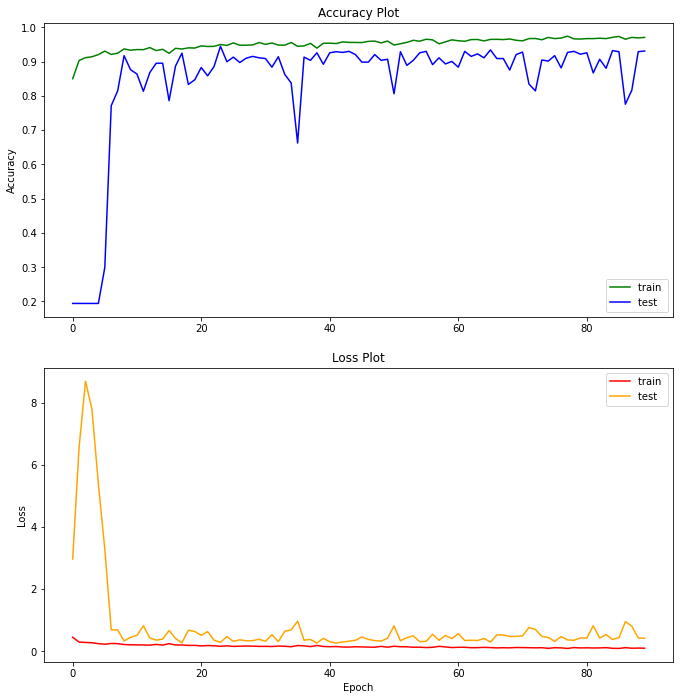

In [ ]:
plot_history(history)

In [ ]:
#accuracy of model
from sklearn.metrics import accuracy_score, confusion_matrix

score = model_cnn_lstm.evaluate(X_test,y_test)
print("Testing Accuracy Score is : ",score[1])

score = model_cnn_lstm.evaluate(X_train,y_train)
print("Training Accuracy Score is : ",score[1])

30/30 [==============================] - 0s 10ms/step - loss: 0.4150 - accuracy: 0.9307
Testing Accuracy Score is :  0.930745005607605
120/120 [==============================] - 1s 10ms/step - loss: 0.0856 - accuracy: 0.9727
Training Accuracy Score is :  0.9726962447166443


## Saving DL Model


In [ ]:
## Saving 'DL' Model

from keras.models import load_model
model_cnn_lstm.save("modelDL.h5")
loaded_model = load_model("modelDL.h5")



In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model_cnn_lstm.predict(X_test)

y_test_np = np.array(y_test).argmax(1)

y_pred_np = np.array(y_pred).argmax(1)

report = classification_report(y_test_np, y_pred_np)

print(report)

# f1 score metrics
f1_score_value = f1_score(y_test_np,y_pred_np,average='weighted')
print("F1 score : ", f1_score_value)

# precision metrics
precision_score_value = precision_score(y_test_np,y_pred_np,average='weighted')
print("Precision score : ", precision_score_value)


30/30 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       185
           1       0.96      0.93      0.94       248
           2       0.91      0.92      0.92       284
           3       0.95      0.92      0.94       236

    accuracy                           0.93       953
   macro avg       0.93      0.93      0.93       953
weighted avg       0.93      0.93      0.93       953

F1 score :  0.9308400735952744
Precision score :  0.9314598885213327


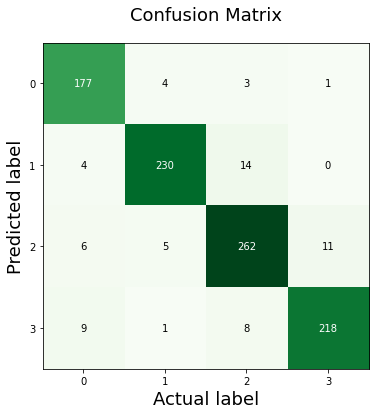

In [ ]:
# Confusion matrix


confusion_matrix_model = confusion_matrix(y_test_np, y_pred_np)

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_model, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Actual label', fontsize=18)
plt.ylabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparision of Performance of Models

In [ ]:
# Models Comparison

number_of_models = ["Logistic Regression", "Decision Tree", "Support Vector Classifier","Random Forest Classifier","XG Boost Classifier", "Gradient Boosting Classifier","CNN,Bi-LSTM Model"]

# Update ml scores
Models_accuracy_validation = [78.0, 92.1, 90.4, 92.5, 92.3, 91.8, 93.0]
Models_accuracy_train =      [79.8, 93.8, 92.3, 98.3, 98.0, 96.9, 97.2]
Models_f1_score =            [77.3, 92.1, 90.4, 92.5, 92.3, 91.7, 93.0]

<Figure size 432x288 with 0 Axes>

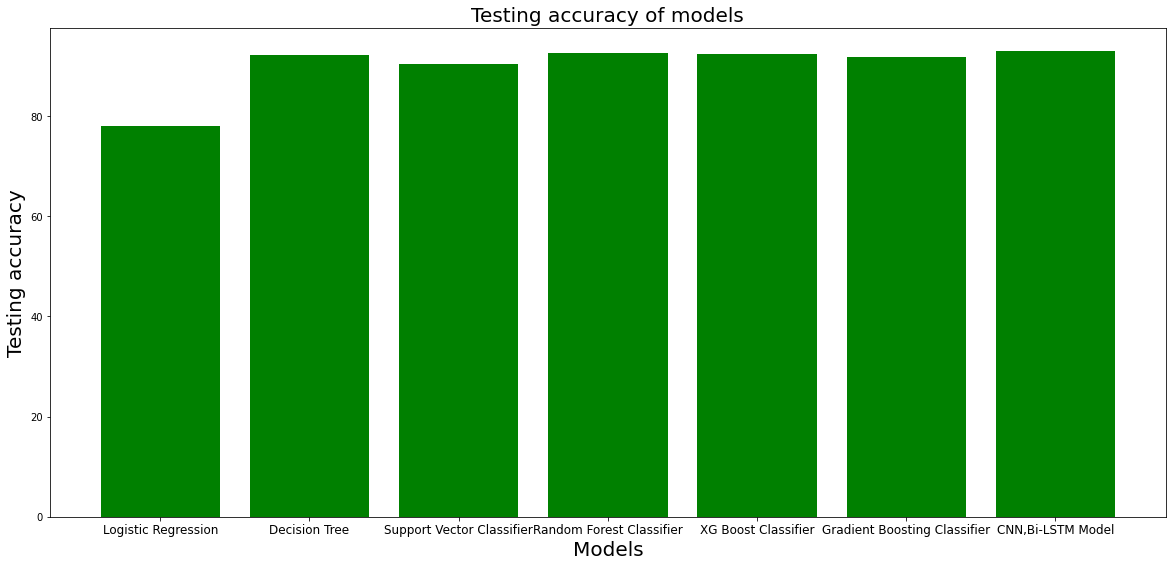

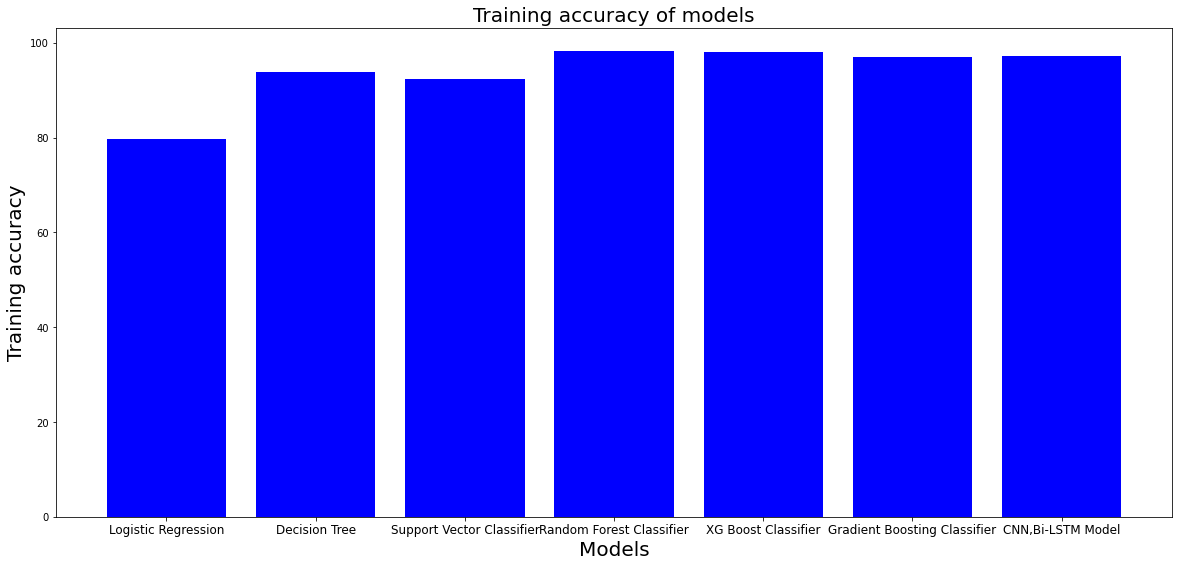

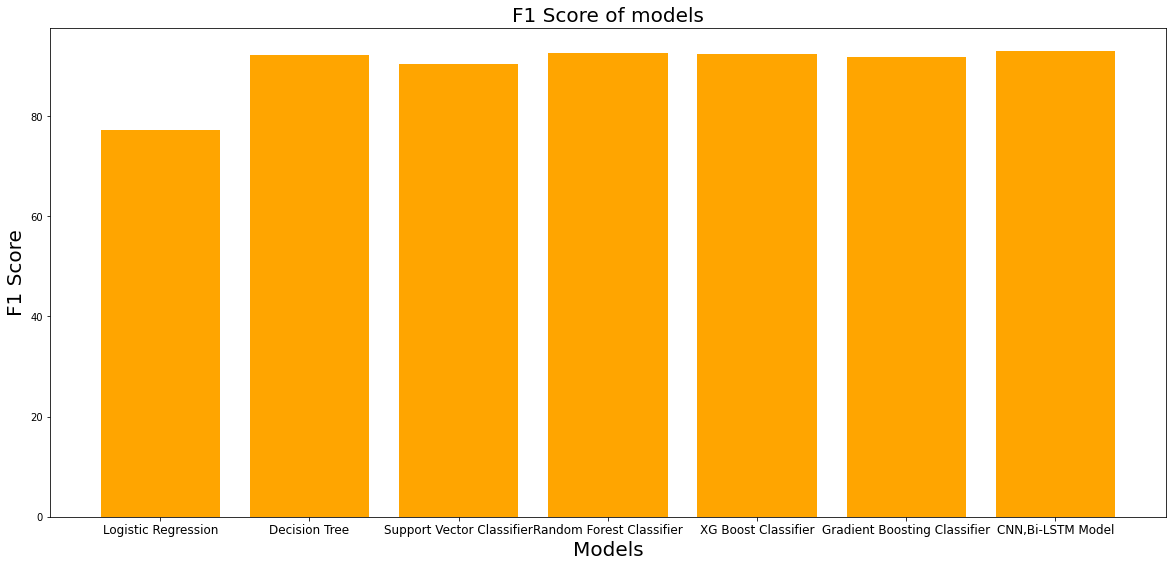

In [ ]:
#Models and thier performance
import matplotlib.pyplot as plt
fig = plt.figure()


plt.figure(figsize=(20, 9))

#  Test set acc plot
plt.bar(number_of_models, Models_accuracy_validation, color = "green")
plt.xlabel("Models",fontsize=20)
plt.ylabel("Testing accuracy",fontsize=20)
plt.title("Testing accuracy of models",fontsize=20)
plt.xticks(fontsize=12)
plt.show()


plt.figure(figsize=(20, 9))

# Train set acc plot
plt.bar(number_of_models, Models_accuracy_train, color = "blue")
plt.xlabel("Models",fontsize=20)
plt.ylabel("Training accuracy",fontsize=20)
plt.title("Training accuracy of models",fontsize=20)
plt.xticks(fontsize=12)
plt.show()


plt.figure(figsize=(20, 9))

# F1 Score plot
plt.bar(number_of_models, Models_f1_score, color = "orange")
plt.xlabel("Models",fontsize=20)
plt.ylabel("F1 Score",fontsize=20)
plt.title("F1 Score of models",fontsize=20)
plt.xticks(fontsize=12)
plt.show()


# Deployment - Streamlit Web app 

In [2]:
# Streamlit webapp

!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.2 MB/s eta 0:00:00


In [3]:
%%writefile streamlit_app.py 
import streamlit as st 
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# scipy module for signal based calculation
from scipy import signal
from scipy.ndimage import label
from scipy.stats import zscore
import joblib
import random
random_num = random.randint(0,7000)


#st.markdown(""" Arrhythmias Prediction System """)

loaded_model = joblib.load('/content/gdrive/MyDrive/rf_modelA.pkl')
from keras.models import load_model

loaded_model_cnn_lstm = load_model("/content/gdrive/MyDrive/modelDL.h5")


st.title(""" Arrhythmias Prediction System """)

df = []
uploaded_file = st.file_uploader("Upload a file")

# reading the Diagnostics
dataframe_diag = pd.read_excel("/content/gdrive/MyDrive/Diagnostics.xlsx")
#filename = dataframe_diag['FileName'][random_num]

#markdownstr = "Selected File is "+ filename
#st.markdown(markdownstr)
#dataframe = pd.read_csv("/content/gdrive/MyDrive/ECGDataDenoised/"+filename+".csv")
 
#ecg_data = dataframe.to_numpy()

if(uploaded_file):
  st.write("Filename: ", uploaded_file.name)
  filename = uploaded_file.name.replace(".csv","")
else:
  filename = dataframe_diag['FileName'][random_num]

markdownstr = "Selected File is "+ filename
st.markdown(markdownstr)
dataframe = pd.read_csv("/content/gdrive/MyDrive/ECGDataDenoised/"+filename+".csv")
ecg_data = dataframe.to_numpy()



plotting_ecg = ecg_data
plotting_ecg = pd.DataFrame(plotting_ecg)
#XG Boost classifier
#import xgboost as xgb

# loading model

start = 0
stop = 10000
duration = (stop-start) / 1000
leadsInformation = ['I', 'II', 'III', 'aVF', 'aVR', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
temp = 0
for i in plotting_ecg:
  if(temp<2):
    fig,ax = plt.subplots()
    axis1 = plt.axes()
    plt.title("ECG signal lead " + leadsInformation[i] + " , time in %.1f seconds" % duration)
    plt.xlabel("Time in milli second ", fontsize=16)
    plt.ylabel("Amplitude (mV)")
    axis1.plot(plotting_ecg[i][start:stop].index,plotting_ecg[i][start:stop].values, color="#51A6D8", linewidth=0.5)
    #st.pyplot(fig)
    #plt.show()
  temp = temp + 1

peakss = []

def group_peaks(p, threshold=5):
    '''
    To group the peaks of the ECG signal
    '''
    output = np.empty(0)

    peakgrp, num_groups = label(np.diff(p) < threshold)

    for i in np.unique(peakgrp)[1:]:
        peak_group = p[np.where(peakgrp == i)]
        output = np.append(output, np.median(peak_group))
    return output


def time_feature_domain(rr):
    results = {}

    results_vector = []
    hr = 60000/rr
    
    # calculating the statistical values of RR and Heart rate variablity
    results['mena RR ms'] = np.mean(rr)
    results['STD RR/SDNN ms'] = np.std(rr)
    results['mean HR beats/min'] = np.mean(hr)
    results['std HR beats/min'] = np.std(hr)
    results['min HR beats/min'] = np.min(hr)
    results['max HR beats/min'] = np.max(hr)
    return results
    
def select_peaks_from_signal(ecgS, threshold=0.3, filterqrs=None):
    '''
    Detect peak using cross correlation threshold
    '''
    if filterqrs is None:
        t = np.linspace(1.5 * np.pi, 3.5 * np.pi, 15)
        filterqrs = np.sin(t)
    
    # normalize data
    ecgS = (ecgS - ecgS.mean()) / ecgS.std()

    # calculate cross correlation
    similarity = np.correlate(ecgS, filterqrs, mode="same")
    similarity = similarity / np.max(similarity)

    # return peaks 
    return ecgS[similarity > threshold].index, similarity


def process_stats_in_ecg_plot(signal):
  signal_processed_stats = []
  leadsInformation = ['I', 'II', 'III', 'aVF', 'aVR', 'aVL', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
  temp = 2
  for i in range(0,12):

    # find peaks
    peaks, similarity = select_peaks_from_signal(signal[i], threshold=0.3)
    print("*******************")
    peakss = peaks
    # grouping peaks
    grouped_peaks = group_peaks(peaks)

   # if(i<=1):
    #  plt.figure(figsize=(10, 3))
     # fig,ax = plt.subplots()
     # axis1 = plt.axes()
     # plt.title("ECG signal lead " + leadsInformation[i] + " , time in %.1f seconds" % duration)
     # plt.xlabel("Time in milli second ", fontsize=16)
     # plt.ylabel("Amplitude (mV)")
    #  axis1.plot(signal[i][start:stop].index,signal[i][start:stop].values, color="#51A6D8", linewidth=0.5)
    # plt.title("Peaks plot (There are multiple peak values found instead of 1 peak) - Lead "+leadsInformation[i])
    # plt.xlabel("Time in milli second ", fontsize=16)
    # plt.ylabel("Amplitude (mV)")
     # axis1.scatter(signal[i][peaks].index,signal[i][peaks].values, color="red")
   
      
    rounded_group_values = np.round(grouped_peaks, 0)
    

    # RR-intervals are the difference between the peaks 
    rr = np.diff(grouped_peaks)
    rr_corrected = rr.copy()

   # if(i<=1):
    #  axis1.scatter(signa2[i][rounded_group_values].index,signa2[i][rounded_group_values].values, color="green")
    #  plt.show()
    
   # st.pyplot(fig)
    # print(rr)
    rr_corrected[np.abs(zscore(rr)) > 2] = np.median(rr)
    rest = time_feature_domain(rr)
    

    lead1_stats = list(rest.values()) #['mena RR ms', 'STD RR/SDNN ms', 'mean HR beats/min', 'std HR beats/min', 'min HR beats/min', 'max HR beats/min']
    for val in lead1_stats:
      signal_processed_stats.append(val)

    signal_processed_stats_flatten = np.array(signal_processed_stats)
    # print(signal_processed_stats_flatten)

  return signal_processed_stats_flatten


def decode_output(output):
  if(output==0):
    return "AFIB"
  if(output==1):
    return "SB"
  if(output==2):
    return "SR"
  if(output==3):
    return "ST"

def predictECG(ecg_processed):
  output = loaded_model.predict(ecg_processed)
  label = decode_output(output)
  output_dl =  loaded_model_cnn_lstm.predict(ecg_processed)
  print("PREDICTION BY LSTM")
  print(output_dt)
  print(np.argmax(output_dl[0]))
  # print(np.argmax(output_dl[0]))
  label2 = decode_output(np.argmax(output_dt[0]))
  print("The ECG is classified as : "+ label+" and classified as "+ label2+ " by CNN +Bi-LSTM neural network")


def predictECG(ecg_processed):
  output = loaded_model.predict(ecg_processed)
  label = decode_output(output)
  output_dl =  loaded_model_cnn_lstm.predict(ecg_processed)
  label2 = decode_output(np.argmax(output_dl[0]))
  return ["The ECG is classified as : "+ label + " by Random Forest model" ,"The ECG is  classified as "+ label2 + " by CNN + Bi-LSTM neural network"]

  #return ("The ECG is classified as : "+ label + " by Random Forest model, classified as "+ label2 + " by CNN + LSTM neural network")


columns_to_select = ['mean RR ms -I', 'min HR beats/min -I', 'mean RR ms -II',
       'min HR beats/min -II', 'min HR beats/min -III', 'mean RR ms -aVF',
       'STD RR/SDNN ms -aVF', 'min HR beats/min -aVF', 'mean RR ms -aVR',
       'min HR beats/min -aVR', 'mean RR ms -aVL', 'min HR beats/min -aVL',
       'mean RR ms -V1', 'STD RR/SDNN ms -V1', 'min HR beats/min -V1',
       'STD RR/SDNN ms -V2', 'min HR beats/min -V2', 'min HR beats/min -V3',
       'mean RR ms -V4', 'min HR beats/min -V4', 'mean RR ms -V5',
       'STD RR/SDNN ms -V5', 'mean HR beats/min -V5', 'min HR beats/min -V5',
       'mean RR ms -V6', 'STD RR/SDNN ms -V6', 'mean HR beats/min -V6',
       'min HR beats/min -V6', 'VentricularRate', 'AtrialRate', 'QRSCount']
all_columns = ['mean RR ms -I',
 'STD RR/SDNN ms -I',
 'mean HR beats/min -I',
 'std HR beats/min -I',
 'min HR beats/min -I',
 'max HR beats/min -I',
 'mean RR ms -II',
 'STD RR/SDNN ms -II',
 'mean HR beats/min -II',
 'std HR beats/min -II',
 'min HR beats/min -II',
 'max HR beats/min -II',
 'mean RR ms -III',
 'STD RR/SDNN ms -III',
 'mean HR beats/min -III',
 'std HR beats/min -III',
 'min HR beats/min -III',
 'max HR beats/min -III',
 'mean RR ms -aVF',
 'STD RR/SDNN ms -aVF',
 'mean HR beats/min -aVF',
 'std HR beats/min -aVF',
 'min HR beats/min -aVF',
 'max HR beats/min -aVF',
 'mean RR ms -aVR',
 'STD RR/SDNN ms -aVR',
 'mean HR beats/min -aVR',
 'std HR beats/min -aVR',
 'min HR beats/min -aVR',
 'max HR beats/min -aVR',
 'mean RR ms -aVL',
 'STD RR/SDNN ms -aVL',
 'mean HR beats/min -aVL',
 'std HR beats/min -aVL',
 'min HR beats/min -aVL',
 'max HR beats/min -aVL',
 'mean RR ms -V1',
 'STD RR/SDNN ms -V1',
 'mean HR beats/min -V1',
 'std HR beats/min -V1',
 'min HR beats/min -V1',
 'max HR beats/min -V1',
 'mean RR ms -V2',
 'STD RR/SDNN ms -V2',
 'mean HR beats/min -V2',
 'std HR beats/min -V2',
 'min HR beats/min -V2',
 'max HR beats/min -V2',
 'mean RR ms -V3',
 'STD RR/SDNN ms -V3',
 'mean HR beats/min -V3',
 'std HR beats/min -V3',
 'min HR beats/min -V3',
 'max HR beats/min -V3',
 'mean RR ms -V4',
 'STD RR/SDNN ms -V4',
 'mean HR beats/min -V4',
 'std HR beats/min -V4',
 'min HR beats/min -V4',
 'max HR beats/min -V4',
 'mean RR ms -V5',
 'STD RR/SDNN ms -V5',
 'mean HR beats/min -V5',
 'std HR beats/min -V5',
 'min HR beats/min -V5',
 'max HR beats/min -V5',
 'mean RR ms -V6',
 'STD RR/SDNN ms -V6',
 'mean HR beats/min -V6',
 'std HR beats/min -V6',
 'min HR beats/min -V6',
 'max HR beats/min -V6',
 'VentricularRate',
 'AtrialRate',
 'QRSDuration',
 'QTInterval',
 'QTCorrected',
 'RAxis',
 'TAxis',
 'QRSCount',
 'QOnset',
 'QOffset',
 'TOffset']

existing_Cols = []
ecg_processed = process_stats_in_ecg_plot(pd.DataFrame(ecg_data))
cols = ['VentricularRate','AtrialRate','QRSDuration','QTInterval' 	,'QTCorrected' 	,'RAxis' 	,'TAxis' 	,'QRSCount' 	,'QOnset' 	,'QOffset' 	,'TOffset']


df_existing_row = dataframe_row =dataframe_diag[dataframe_diag['FileName']=='MUSE_20180111_155154_74000']

print("processed")
print(ecg_processed)
print(ecg_processed.shape)
print("Existing row")
print(df_existing_row)
print(df_existing_row.shape)
values_existing = df_existing_row[cols]

print("Columns existing ")
print(values_existing)
print(values_existing.shape)

df_feat = pd.DataFrame([ecg_processed])
df_feat_2 = pd.DataFrame(values_existing.values)
df_feat_final = pd.concat([df_feat,df_feat_2],axis=1)
df_feat_final.columns = all_columns

df_filtered_features = df_feat_final[columns_to_select]

output = predictECG(df_filtered_features)

option = st.selectbox(
    'Select the model for classification: ',
    ('Randomforest', 'CNN+Bi-LSTM'))

st.write('You selected:', option)

if(option=='Randomforest'):
  st.markdown(output[0])

if(option=='CNN+Bi-LSTM'):
  st.markdown(output[1])



Writing streamlit_app.py


# Running the Streamlit App

In [ ]:
# https://ngrok.com/download
# https://dashboard.ngrok.com/get-started/setup
# to extract tar.gz files
!tar -xzvf"/content/gdrive/MyDrive/ngrokN.tgz"

ngrok


In [ ]:
!./ngrok authtoken 2JYEm5qeS7VRYHANJrZGrcwK0Rq_2E7PZ6iAyAqs5X3BtPdHf

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=304f8f43df6079cc0e435d6a4f27cb7b6aa3ce390e579e08304c2151fa9d86d1
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://6643-35-234-29-119.ngrok.io" -> "http://localhost:80">

In [ ]:
!pip install upgrade protobuf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
!pip install protobuf==3.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.58.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-translate 3.8.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21

In [4]:
# https://gist.github.com/zentralwerkstatt/8362a44463894fba8f7229a7a7223108
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

[############......] - finalize:color-convert: sill finalize /root/.npm/_npx/22

npx: installed 22 in 9.983s
your url is: https://mean-steaks-cough-35-190-150-196.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.190.150.196:8501

2023-01-20 10:05:31.668070: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
*******************
*******************
*******************
*******************
*******************
*******************
*******************
*******************
*******************
*******************
*******************
*******************
processed
[ 323.5          10.91852947  185.67799723    6.12682733  172.16642755
  196.72131148  156.74137931  145.85518448 2030.30884868 1773.10645966
  180.18018018 3870.96774194  103.54545455  131.83270296 3120.79218066
 2049.00949125  186.04651163 5454.54545455  205.88636364  143.33